## Healthcare for All

Your task as a data analyst is to help improve the process by developing machine learning models to predict the gift amount based on X features. Follow the data analysis workflow to build the model.

In this business case, you have a data of donors from previous campaings. We want to use this data to send mail promoting the campaign, the problem is that the cost of each mail is 0.68$ and there are over 95.000 donors in the database, so it is not viable to mail every donor.

You're manager also informed you that in previous research it was discovered that sending mail to the most likely donors would increase the probability of the donation, while sending mail to the least likely donors would not impact on the probability of the donation. Therefore, your focus should be sending mail to the most likely donors.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Checking Dataset

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Ironhack/dapt_rmt_may_23/unit 4/4.01_dataset.xlsx')
data#.head()

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,RFA_2,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
0,95515,IL,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,L4E,31,4.0,10.0,7.741935,0.0
1,148535,CA,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,L2G,3,18.0,25.0,15.666667,0.0
2,15078,NC,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,L4E,27,12.0,5.0,7.481481,0.0
3,172556,CA,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,L4E,16,9.0,10.0,6.812500,0.0
4,7112,FL,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,L2F,37,14.0,15.0,6.864865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,AK,XXXX,,M,C2,NaN,,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,L1G,1,NaN,25.0,25.000000,0.0
95408,122706,TX,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,L1F,1,NaN,20.0,20.000000,0.0
95409,189641,MI,XXXX,X,M,C3,NaN,,376,377,4,3,263,264,319,345,12178,,33,14,7,17,L3E,7,3.0,10.0,8.285714,0.0
95410,4693,CA,XXXX,,F,C1,7.0,H,2421,2459,11,10,552,544,568,556,15948,,127,36,9,31,L4F,41,4.0,18.0,12.146341,18.0


In [4]:
data.shape

(95412, 28)

In [5]:
data.describe()

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
count,95412.000000,74126.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,85439.000000,95412.000000,95412.000000,95412.000000
mean,95778.176959,3.886248,1061.838238,1133.031086,4.224249,3.875886,340.056387,387.027114,387.418302,430.792961,15722.738230,46.973347,18.435144,5.348939,12.856936,9.602031,8.093739,17.313127,13.347786,0.793073
std,55284.596094,1.854960,941.765892,947.384618,2.307938,2.244389,162.883283,173.614627,161.270738,171.643319,8563.646776,22.970378,8.583794,1.219785,4.544033,8.554342,8.213242,13.956630,10.769997,4.429725
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.285714,0.000000
25%,47910.750000,2.000000,513.000000,555.000000,3.000000,2.000000,231.000000,274.000000,277.000000,314.000000,10788.000000,27.000000,11.000000,5.000000,11.000000,3.000000,4.000000,10.000000,8.384615,0.000000
50%,95681.500000,4.000000,737.000000,803.000000,4.000000,3.000000,310.000000,355.000000,354.000000,397.000000,13727.500000,47.000000,18.000000,6.000000,12.000000,7.000000,6.000000,15.000000,11.636364,0.000000
75%,143643.500000,5.000000,1213.000000,1328.250000,5.000000,5.000000,414.000000,465.000000,466.000000,514.000000,18169.000000,64.000000,25.000000,6.000000,13.000000,13.000000,11.000000,20.000000,15.477955,0.000000
max,191779.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,174523.000000,195.000000,61.000000,19.000000,78.000000,237.000000,1088.000000,1000.000000,1000.000000,200.000000


In [6]:
# Checking for nulls:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls[nulls['percentage'] > 0].sort_values('percentage', ascending = False)

,percentage
INCOME,22.309563
TIMELAG,10.452564


The columns might be important factors in predicting the gift value, so even though it has a lot of null values, we will not drop them, at least not before checking correlations.

In [7]:
# Checking correlations with the target:
data.corr()['TARGET_D'].sort_values(ascending=False)

TARGET_D    1.000000
LASTGIFT    0.061678
AVGGIFT     0.044299
HV2         0.039860
HV1         0.039081
IC5         0.037328
IC4         0.035952
IC2         0.035496
IC3         0.033786
INCOME      0.032063
IC1         0.031780
HV3         0.030915
HV4         0.030867
NUMPRM12    0.025134
NUMPROM     0.017337
CARDPM12    0.016358
CONTROLN    0.013366
CARDPROM    0.011302
NGIFTALL    0.004899
TIMELAG     0.003612
Name: TARGET_D, dtype: float64

In [8]:
data.corr()['TARGET_D'][['INCOME', 'TIMELAG']]

INCOME     0.032063
TIMELAG    0.003612
Name: TARGET_D, dtype: float64

### Dealing with NaNs

What are some ways to cope with the null values? When should you use each one?

1 - We might loose up to ~32% of the data if dropping the NaNs (rows). The trade-off here is between the amount of data vs data quality.

2 - The columns have some correlation with the target (comparatively) so I wouldn't drop them. The trade-off here is between the feature importance vs data quality.

3 - For Income, we could fill the NaNs with 0, since the minimum value for Income in the df is 1 and we'd expect people without income. Therefore we assume that the NaNs are from people without income.

4 - To contain the data quality decrease when "making up" data, I wouldn't transform the NaNs into zeros for TimeLag. Using the mean/median will "maintain" our distributions. (I like mean, but median might work better if you have expressive outliers)

5 - You can also use Interpolation techniques - using information from other columns/rows to find the value to replace.

#### Filling NaNs for categorical columns

How could we find out gender value when this field is null?

In [9]:
data['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [10]:
data['GENDER'] = data['GENDER'].apply(lambda x: x if x in ['M', 'F'] else 'O')

data['GENDER'].value_counts()

# Another option would have been to fill the nans with the mode (highest count category, in this case F)

F    51277
M    39094
O     5041
Name: GENDER, dtype: int64

The Homeownership has two values [H = Homeowner, U = Unknown]. If you had to fill null values, how would it be?

In [11]:
data['HOMEOWNR'].value_counts()

H    52354
     22228
U    20830
Name: HOMEOWNR, dtype: int64

In this case, makes sense that the missing data is converted to U (unknown), since it is a class that already exists and if the value is missing you don't know if the person is a home owner.

In [12]:
data['HOMEOWNR'] = np.where(data['HOMEOWNR'] != 'H', 'U', 'H')
data['HOMEOWNR'].value_counts()

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

#### Filling NaNs for numerical columns

##### Using Mean or Median:

<Axes: >

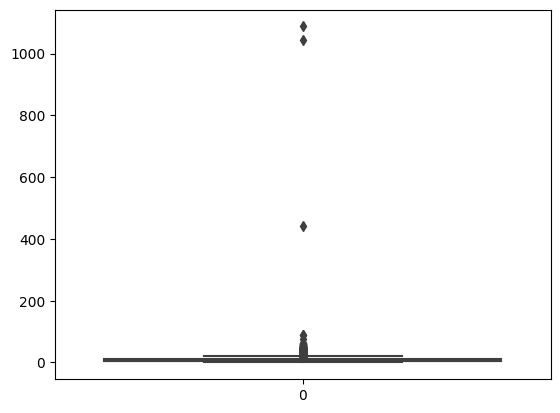

In [13]:
# best plot to check for outliers
sns.boxplot(data['TIMELAG'])

In [14]:
data['TIMELAG'].median(), data['TIMELAG'].mean()

(6.0, 8.093739393017241)

In [15]:
# for 'TIMELAG' I'll choose median to replace the NaNs
# since we have considerable outliers as we saw in .describe() and in the plot above
data['TIMELAG'] = data['TIMELAG'].fillna(data['TIMELAG'].median())

##### Interpolation

For interpolation techniques, the order of the row matter, so it might make sense to use them in specific cases. I don't see a column that could perfectly benefit from interpolation, so I'm using "Income" to demonstrate.

<Axes: >

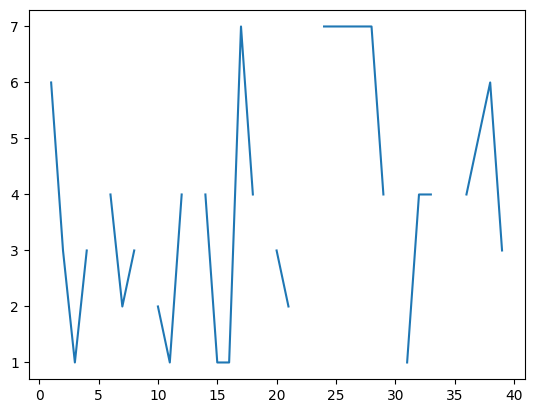

In [16]:
data['INCOME'][0:40].plot()

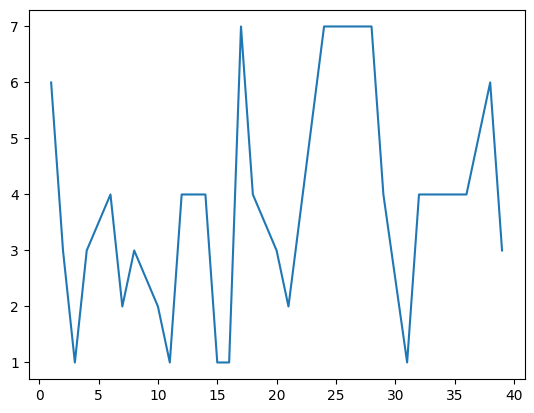

In [17]:
new_income_data = data['INCOME'][0:40].interpolate(method='linear')
# linear interpolation assumes that the rate of change between the values is constant
new_income_data.plot()
plt.show()

##### Comparing distributions to choose which technique to use:

It's not wise to make a decision based on 'how it looks on the plot'. When we

1.   List item
2.   List item

learn about p-values we'll see how to check for normality with an actual metric.

Want a better understanding of polynomial method? Here is something to [read](https://whatis.techtarget.com/definition/polynomial-interpolation).

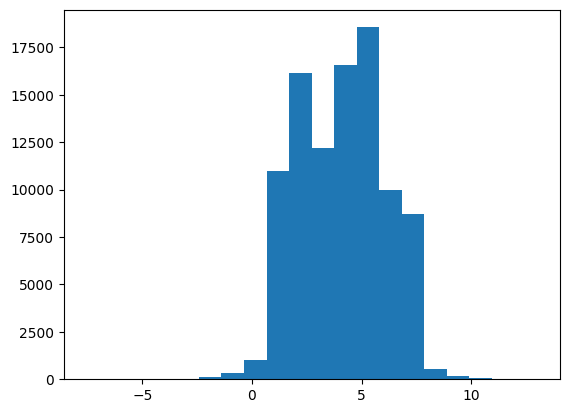

In [18]:
# you can try different methods and check which ones are more normally distributed
plt.hist(data['INCOME'].interpolate(method='polynomial', order=2), bins=20)
plt.show()

In [19]:
# Above we used interpolation on "Income" just for demonstration.
# We will be replacing the nulls with 0, assuming that is what would the data be in "real life":
data['INCOME'].value_counts()

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [20]:
data['INCOME'] = data['INCOME'].fillna(0)
data['INCOME'].isna().sum()

0

### EDA

#### Checking outliers

We start checking for outliers on the target variable:

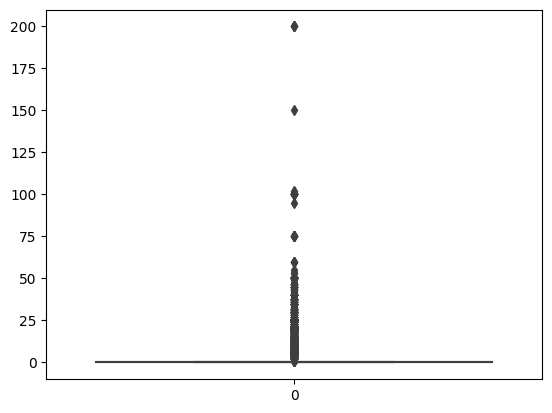

In [21]:
# best plot to check for outliers
sns.boxplot(data['TARGET_D'])
plt.show()

<Axes: xlabel='TARGET_D', ylabel='Density'>

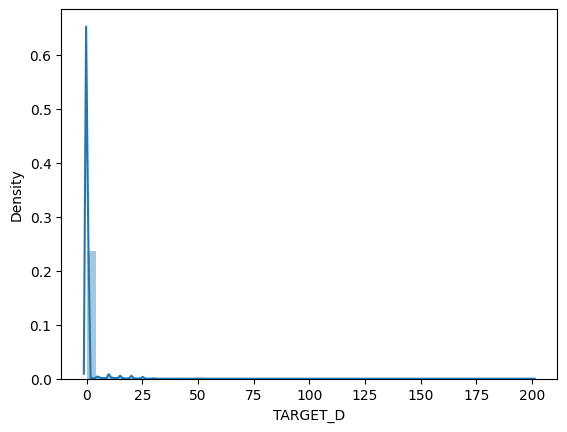

In [22]:
# getting a better look at the distribution:
sns.distplot(data['TARGET_D'])

We have a big spike at zeros, because most donors did not donate on the previous campaign.

In [23]:
# An interesting insight, is that about 95% of the donors, did not donate in the previous compaign
data[data['TARGET_D'] == 0]

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,RFA_2,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D
0,95515,IL,XXXX,,F,T2,0.0,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,L4E,31,4.0,10.0,7.741935,0.0
1,148535,CA,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,L2G,3,18.0,25.0,15.666667,0.0
2,15078,NC,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,L4E,27,12.0,5.0,7.481481,0.0
3,172556,CA,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,L4E,16,9.0,10.0,6.812500,0.0
4,7112,FL,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,L2F,37,14.0,15.0,6.864865,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95406,35088,FL,XXXX,,F,S2,6.0,H,733,875,4,3,285,288,333,334,11390,,59,23,5,12,L4D,24,3.0,2.0,3.375000,0.0
95407,184568,AK,XXXX,,M,C2,0.0,U,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,L1G,1,6.0,25.0,25.000000,0.0
95408,122706,TX,XXXX,,M,C1,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,L1F,1,6.0,20.0,20.000000,0.0
95409,189641,MI,XXXX,X,M,C3,0.0,U,376,377,4,3,263,264,319,345,12178,,33,14,7,17,L3E,7,3.0,10.0,8.285714,0.0


<Axes: xlabel='TARGET_D', ylabel='Density'>

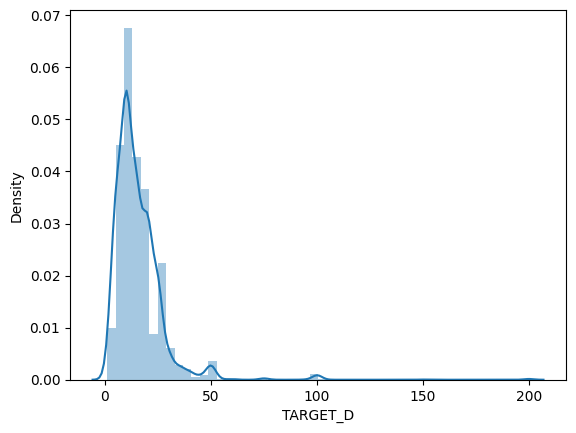

In [24]:
# So, let's take a look at the distribution without the zeros, to better determine outliers:
sns.distplot(data[(data['TARGET_D'] > 0)]['TARGET_D']) #  & (data['TARGET_D'] < 50)

In [25]:
# out of all the donors, very few donated above 50, so maybe we can consider those outliers:
print("Donors:", len(data[(data['TARGET_D'] > 0)]))
print("Donations > 50:", len(data[data['TARGET_D'] > 50]))

Donors: 4843
Donations > 50: 46


You can also check for outliers on the features, but I'd leave that for later and only if we really need it. Example:

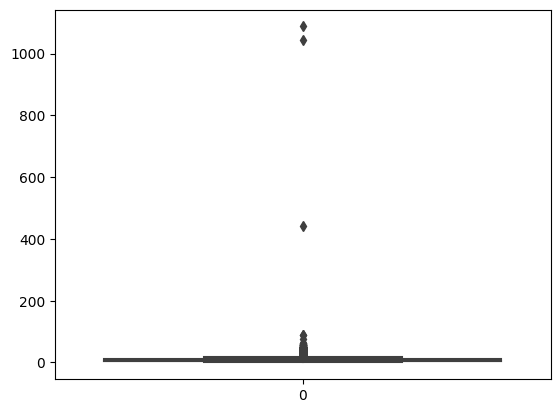

In [26]:
sns.boxplot(data['TIMELAG'])
plt.show()

The above plot could serve as some interesting insight about the timelag from last donation.

#### Checking Distributions
In this step, we are plotting distributions of all the variables to:
* Understand data: Distribution reveals central tendencies, variabilities, patterns, and unusual observations in the dataset.
* Preprocessing: Determines necessary transformations or adjustments to meet algorithm requirements.
* Feature selection: Prioritize informative features by considering variable distributions.
* Outlier detection: Identify and handle data points deviating significantly from the rest of the dataset.
* Assumptions of tests: Verify if data meets requirements (normality, independence) for statistical tests and modeling techniques.

In [27]:
numericals = data.select_dtypes(np.number)
categoricals = data.select_dtypes(np.object)
numericals.shape, categoricals.shape

((95412, 20), (95412, 8))

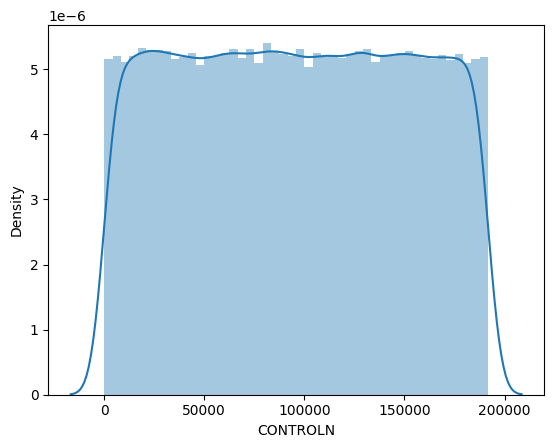

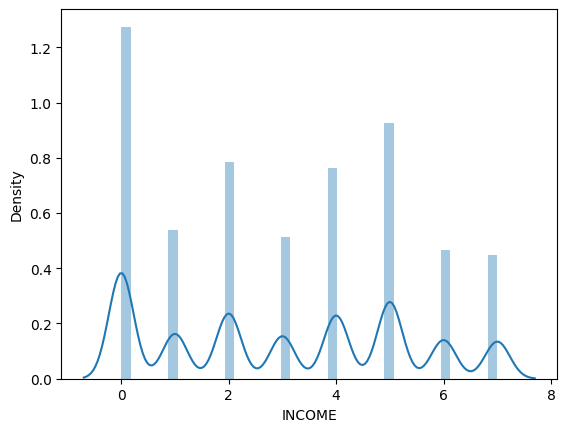

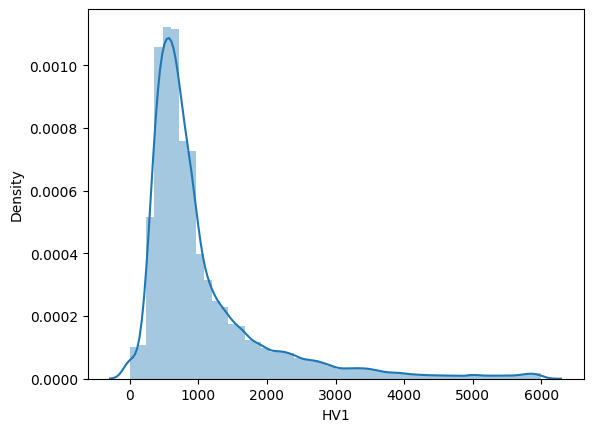

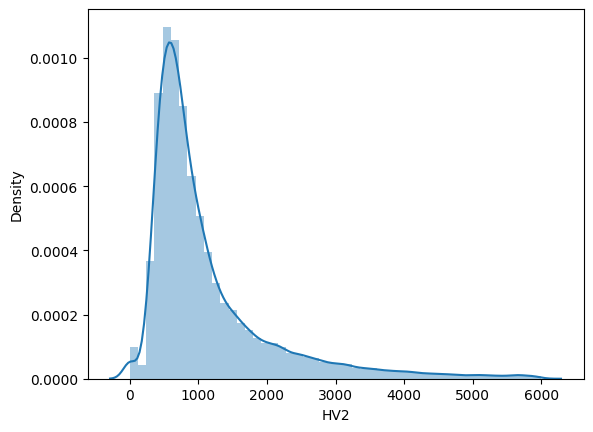

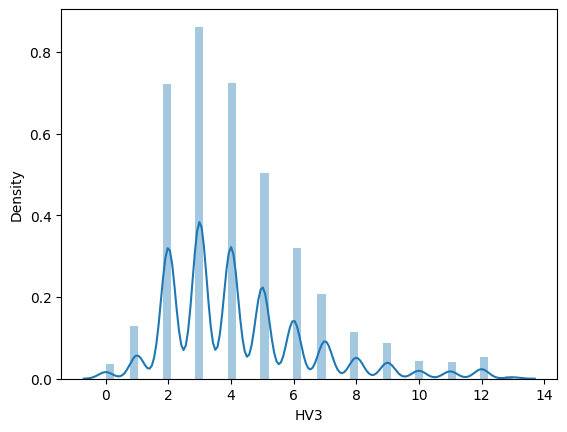

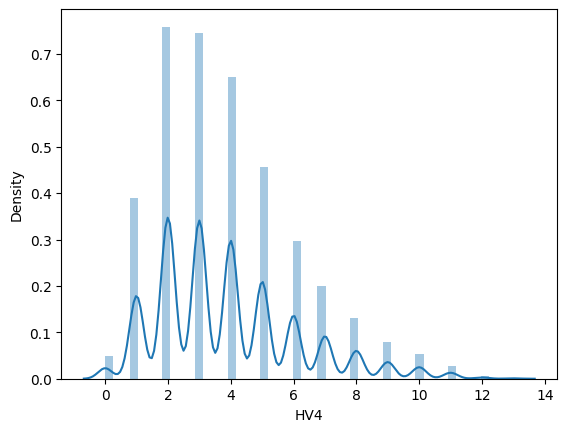

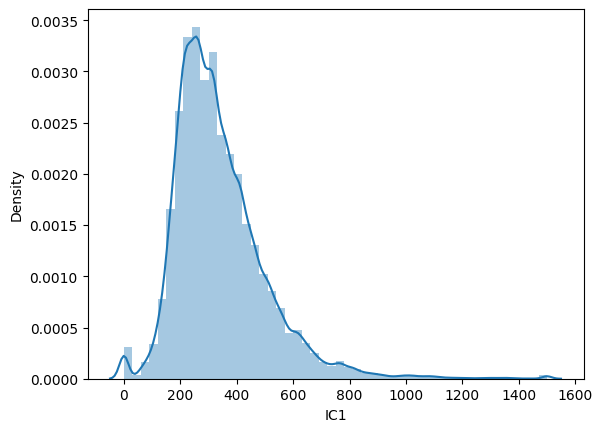

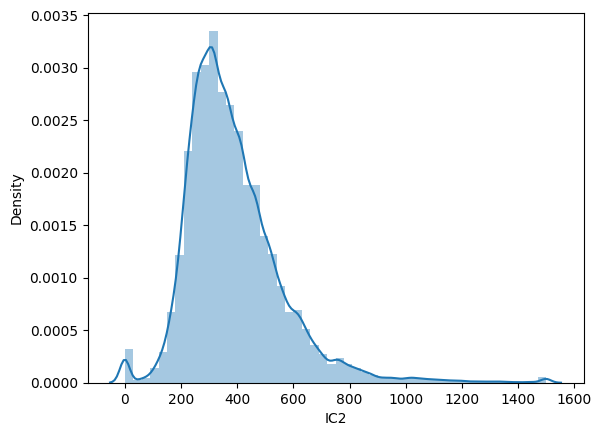

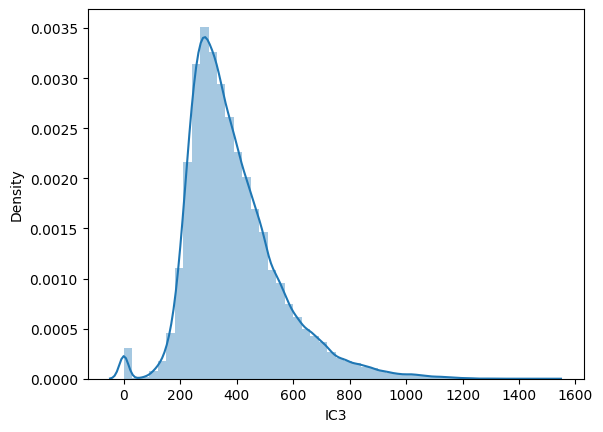

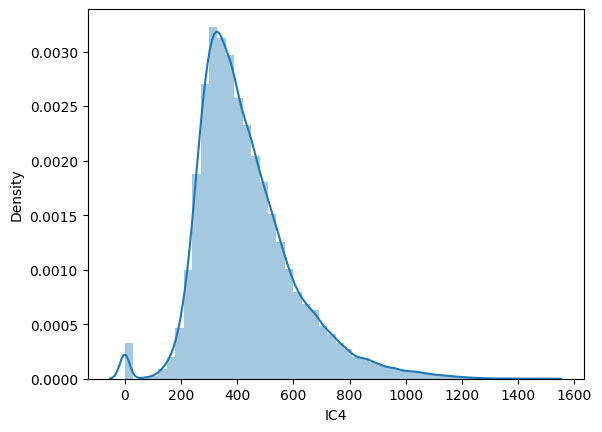

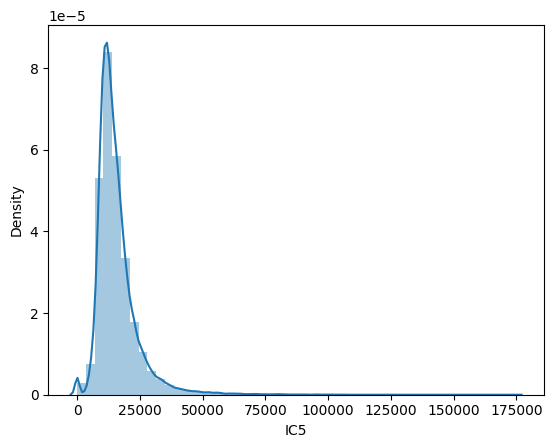

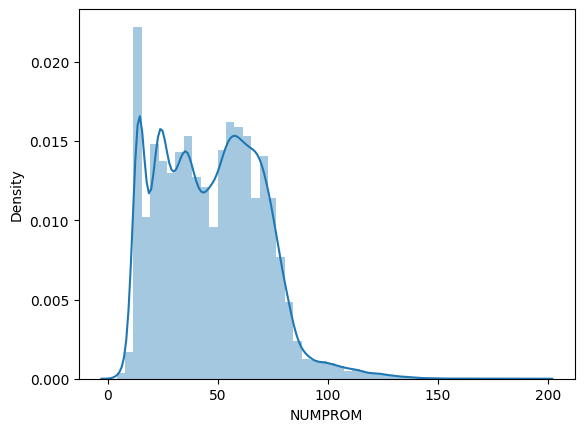

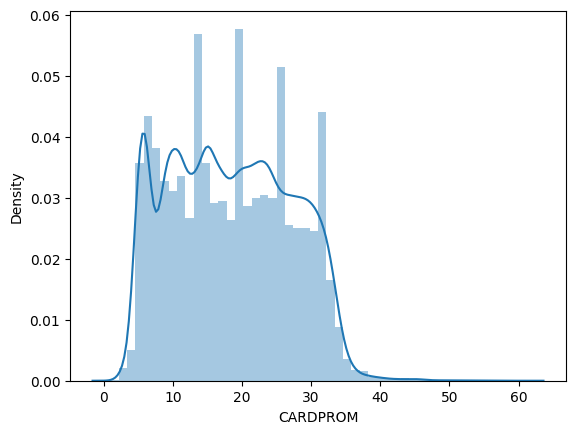

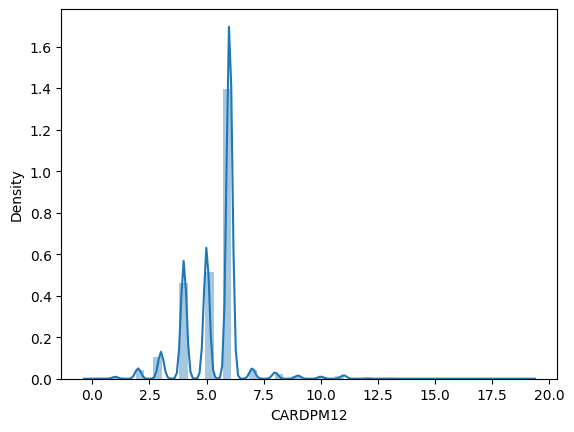

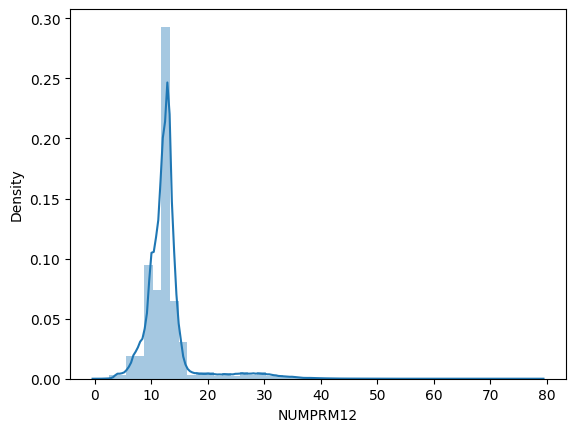

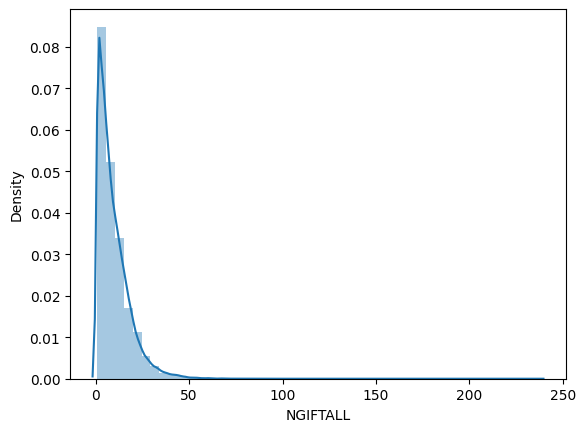

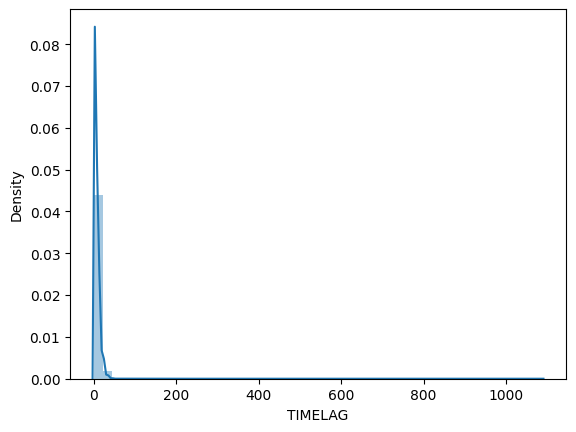

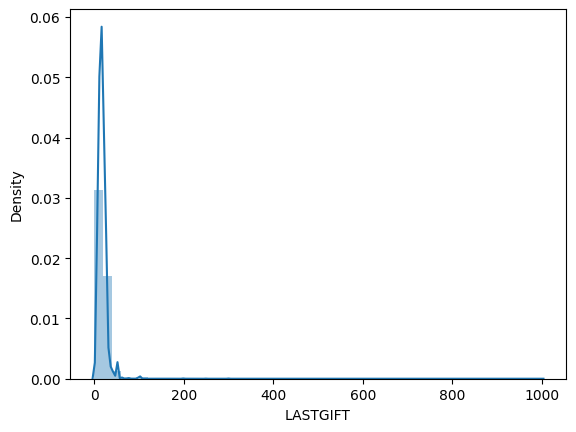

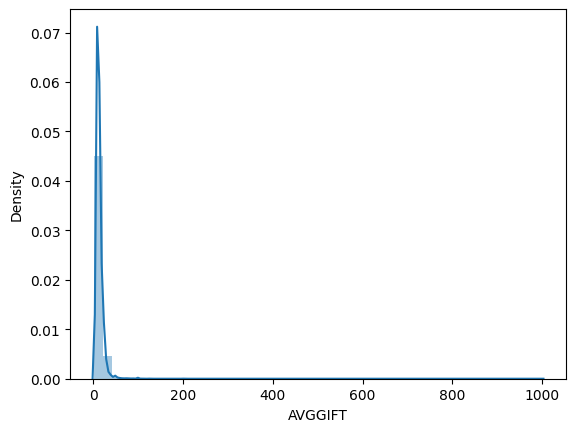

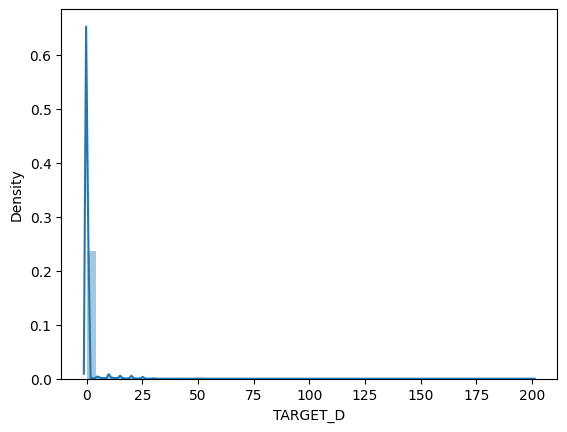

In [28]:
for col in numericals.columns:
  sns.distplot(data[col])
  plt.show()

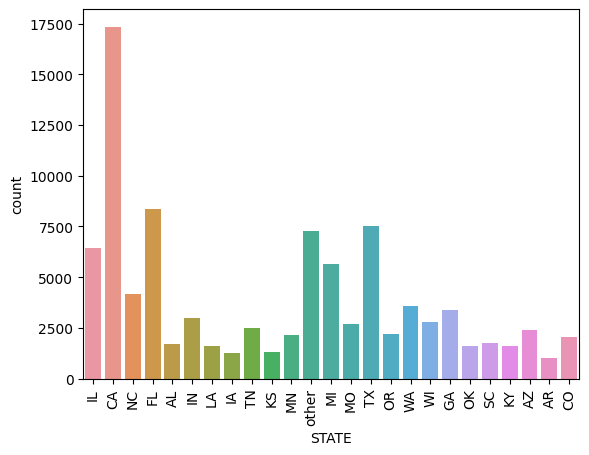

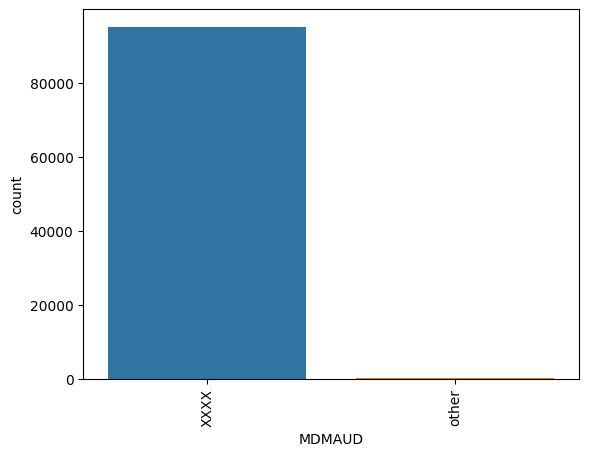

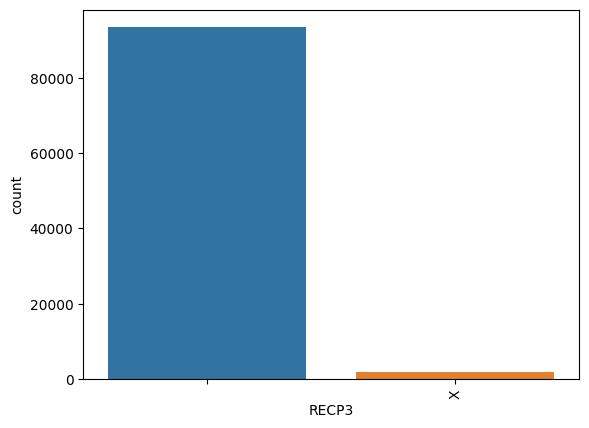

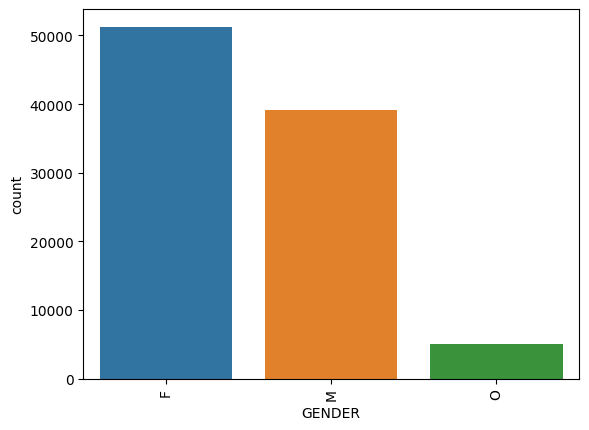

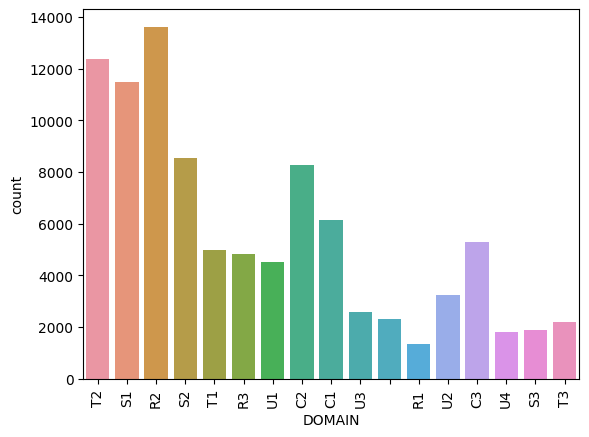

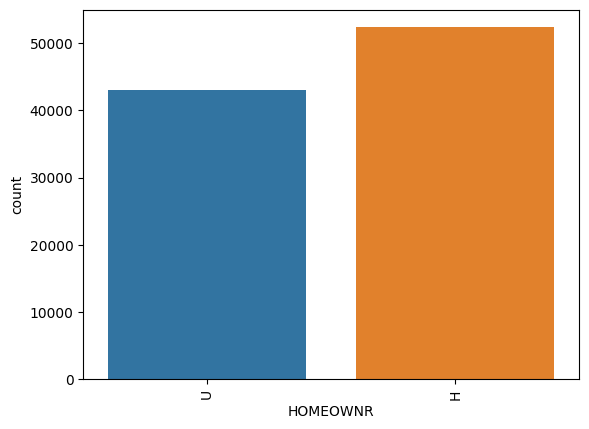

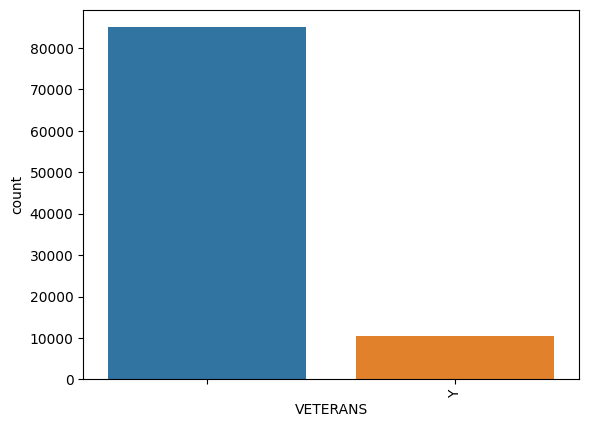

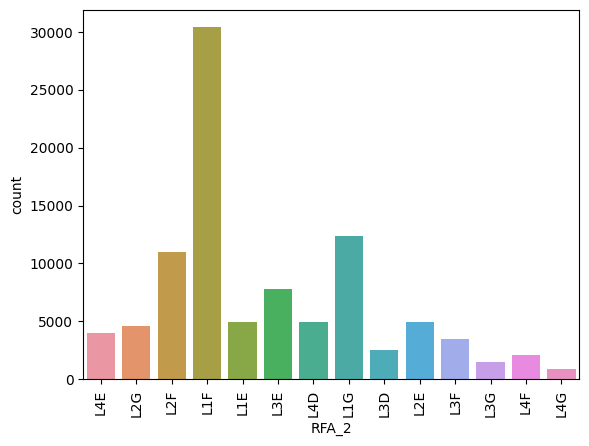

In [106]:
for col in categoricals.columns:
  sns.countplot(x=data[col])
  plt.xticks(rotation=90)
  plt.show()

##### Possible insights from analyzing distributions:

**Numerical variables:**
* Central tendency: Understand the typical or average value of the numerical variable.
* Spread: Determine the extent to which the data values are dispersed or clustered together.
* Skewness: Identify if the data distribution is asymmetrical, leaning towards higher or lower values.
* Outliers: Identify extreme values that may indicate anomalies or errors in the data.
* Shape: Gain insights into the overall pattern or form of the data distribution.
* Correlation: Explore the strength and direction of relationships between numerical variables.
* Trends: Identify patterns or changes in the data over time or across different groups.
* Distribution type: Determine the underlying probability distribution that the data follows.

**Categorical variables:**
* Frequency: Understand the frequency of occurence of each category. Identify the most and the least common categories.
* Imbalance: Detect class imbalance amongst features.
* Patterns: Uncover trends or shifts in your data.
* Comparison: Compare distributions across subgroups to identify differences or similarities.

#### Checking Relationships - Regression

One of the most important steps on our process is to analyze the data to better understand how the features relate with the target.

Examining relationships between features and the target variable provides valuable insights for feature selection, model engineering, interpretation of model preditions, and enhancing predictive accuracy.

CONTROLN    0.013366
dtype: float64


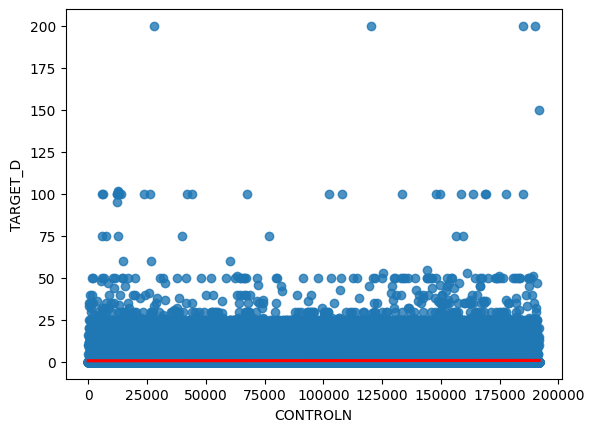

INCOME    0.016777
dtype: float64


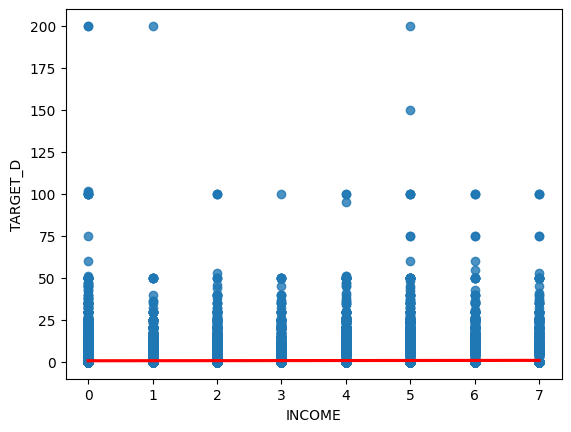

HV1    0.039081
dtype: float64


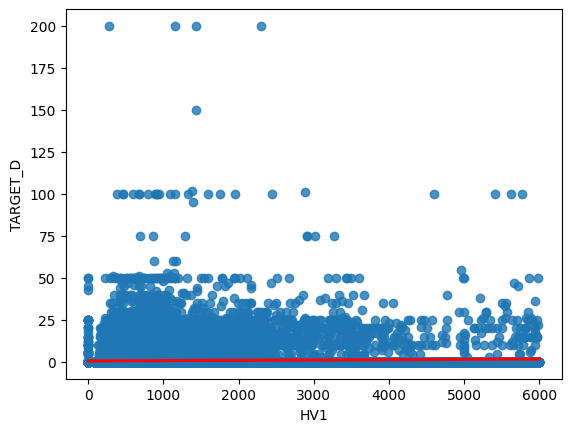

HV2    0.03986
dtype: float64


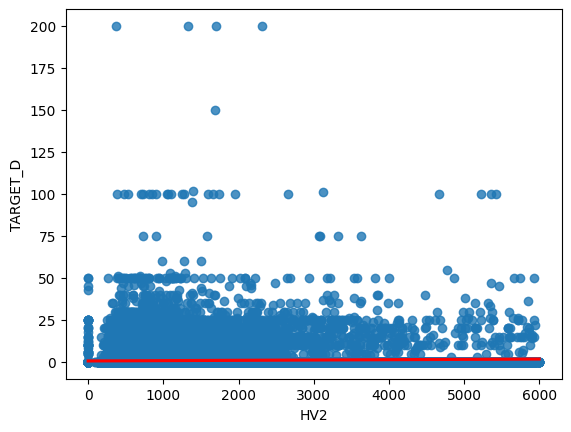

HV3    0.030915
dtype: float64


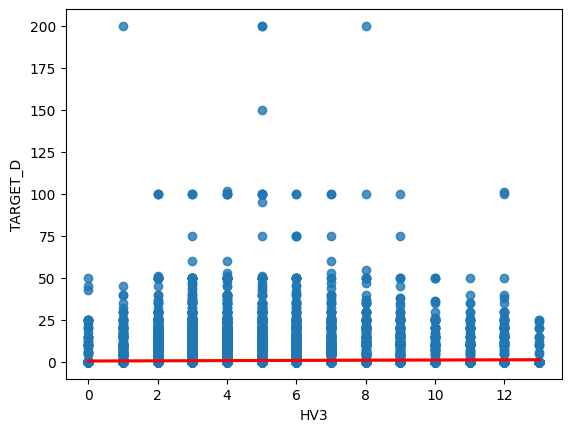

HV4    0.030867
dtype: float64


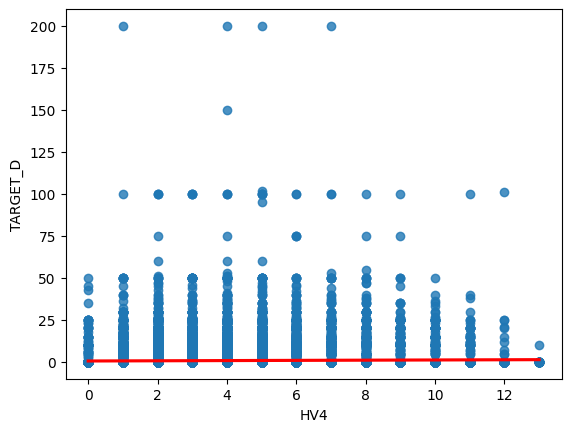

IC1    0.03178
dtype: float64


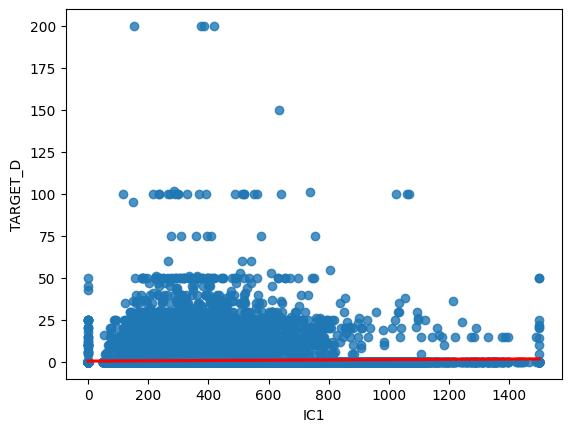

IC2    0.035496
dtype: float64


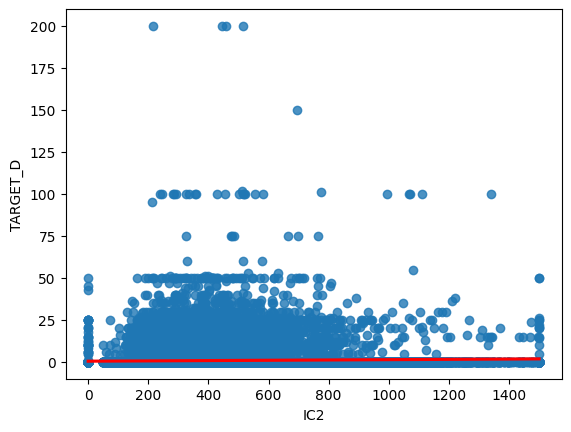

IC3    0.033786
dtype: float64


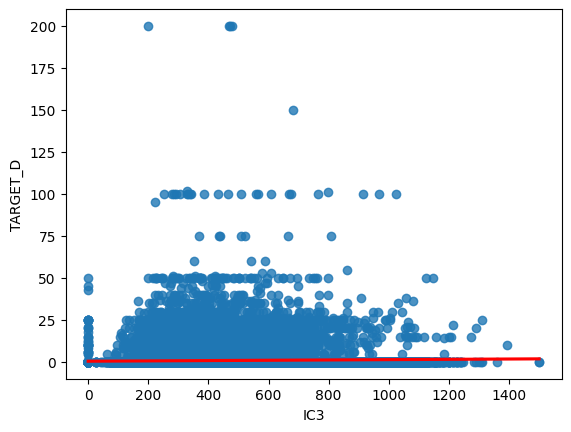

IC4    0.035952
dtype: float64


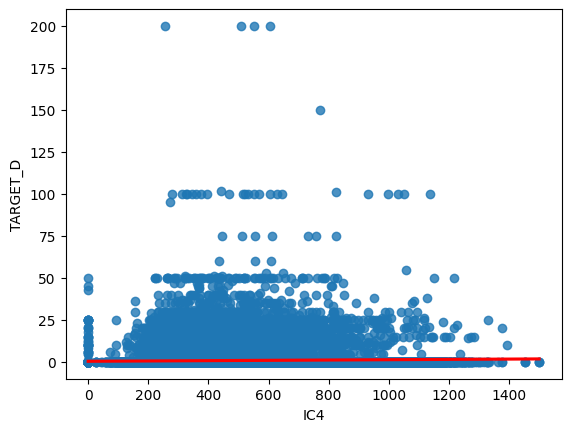

IC5    0.037328
dtype: float64


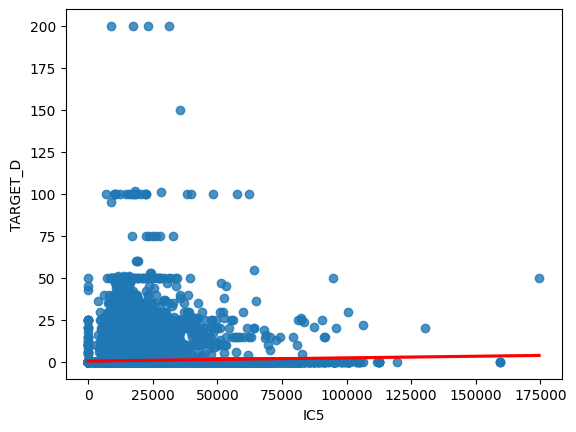

NUMPROM    0.017337
dtype: float64


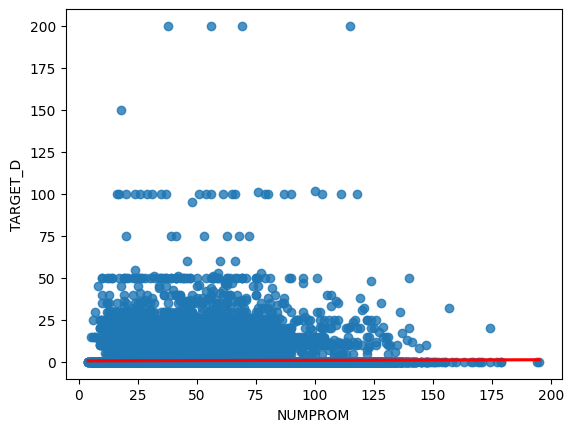

CARDPROM    0.011302
dtype: float64


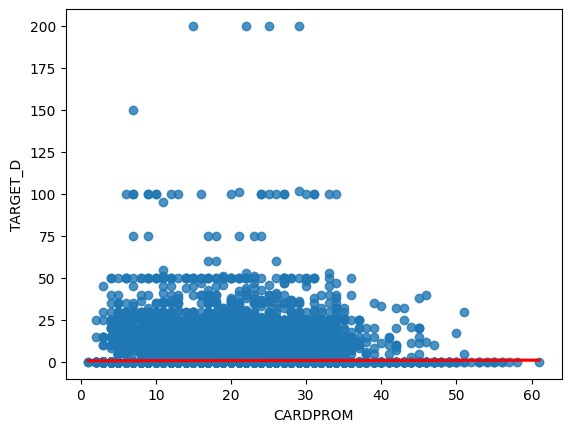

CARDPM12    0.016358
dtype: float64


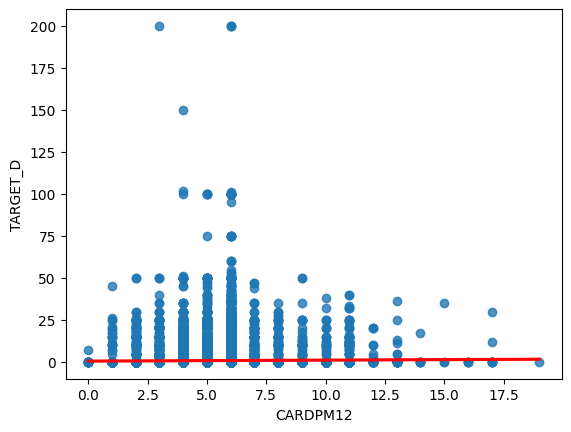

NUMPRM12    0.025134
dtype: float64


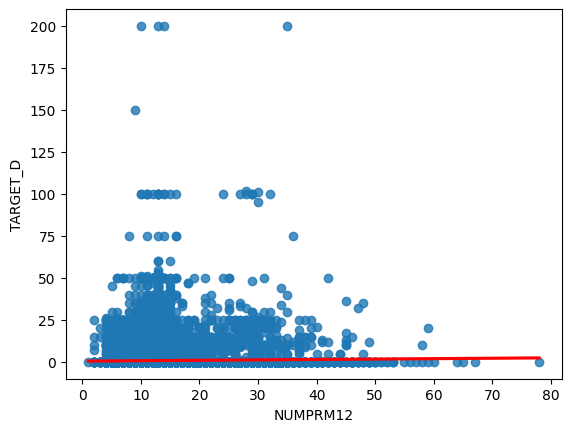

NGIFTALL    0.004899
dtype: float64


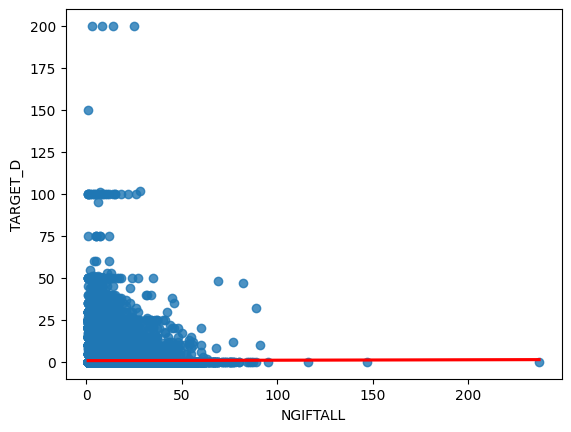

TIMELAG    0.003979
dtype: float64


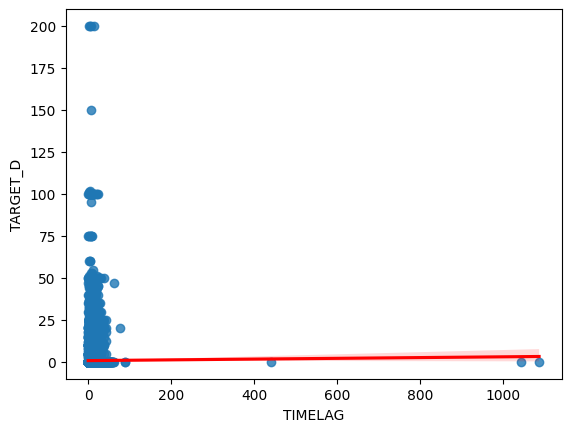

LASTGIFT    0.061678
dtype: float64


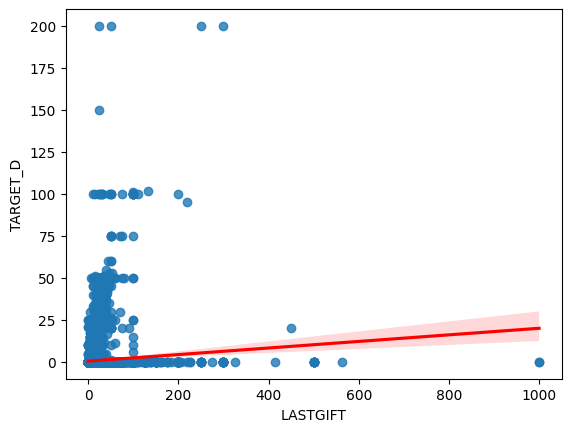

AVGGIFT    0.044299
dtype: float64


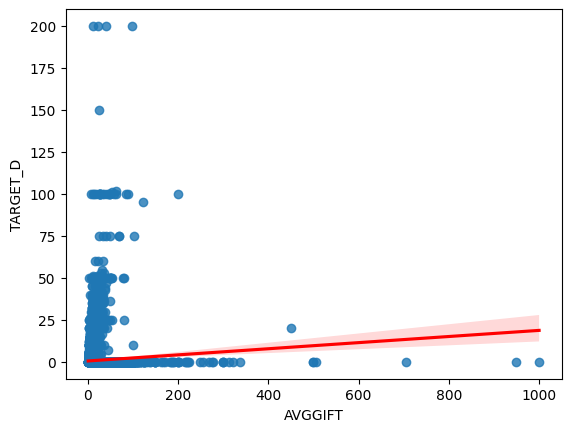

TARGET_D    1.0
dtype: float64


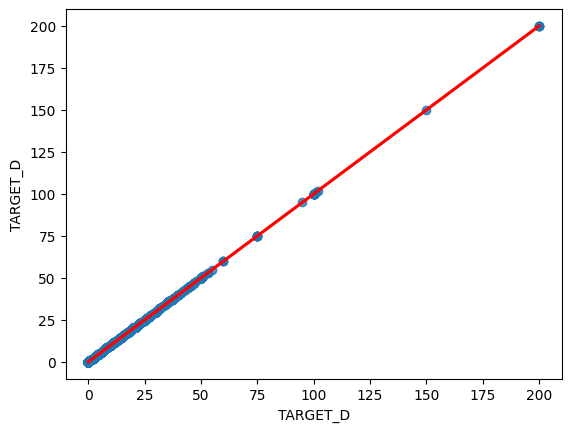

In [30]:
# Numericals:
for col in numericals.columns:
  print(data[[col]].corrwith(data["TARGET_D"]))
  sns.regplot(x=data[col], y=data["TARGET_D"], line_kws={"color": "red"})
  plt.show()

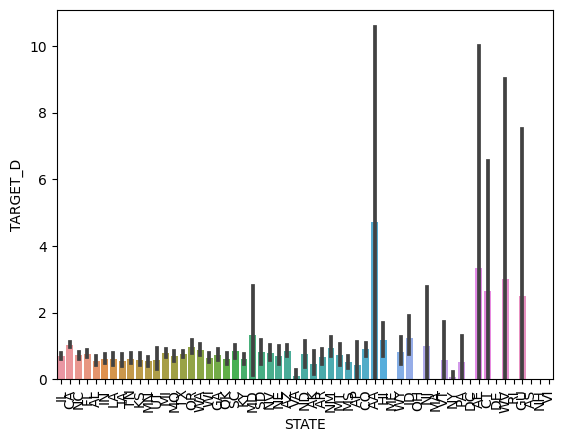

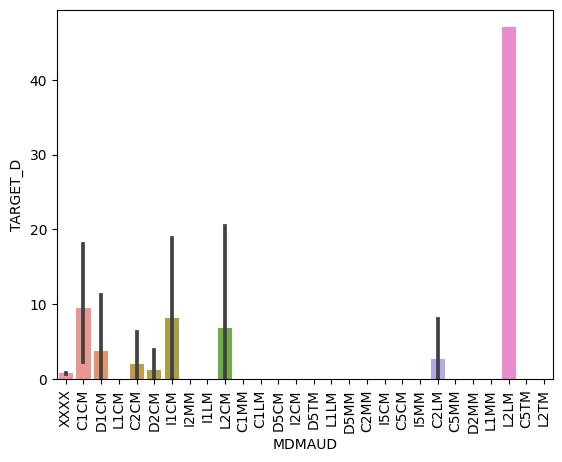

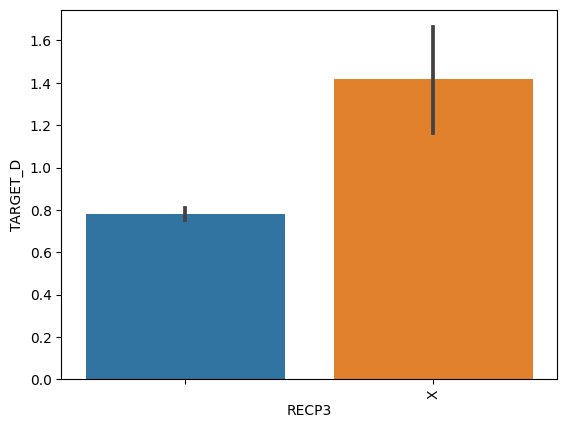

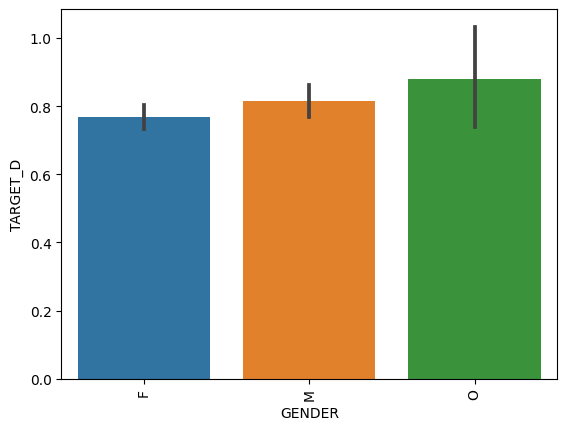

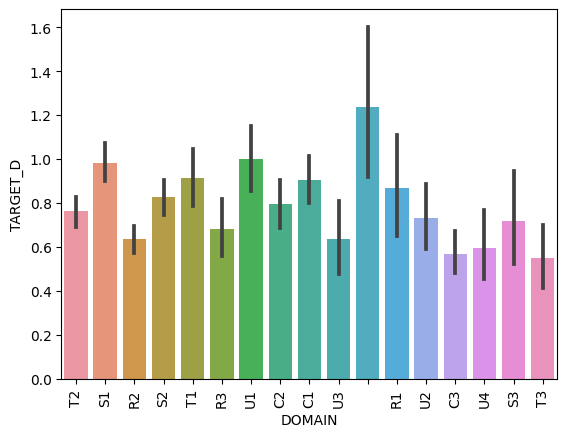

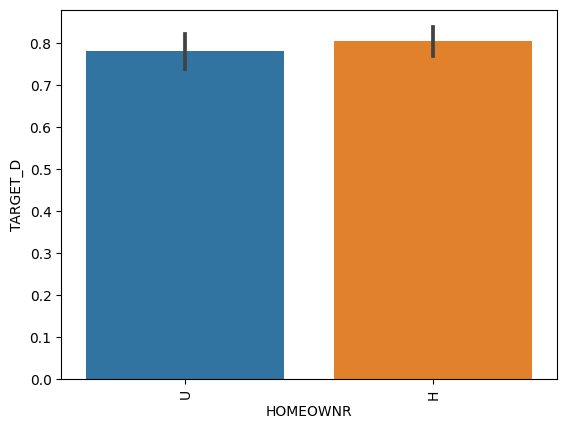

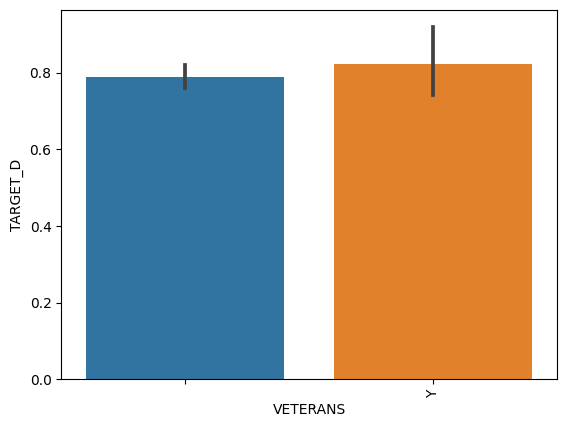

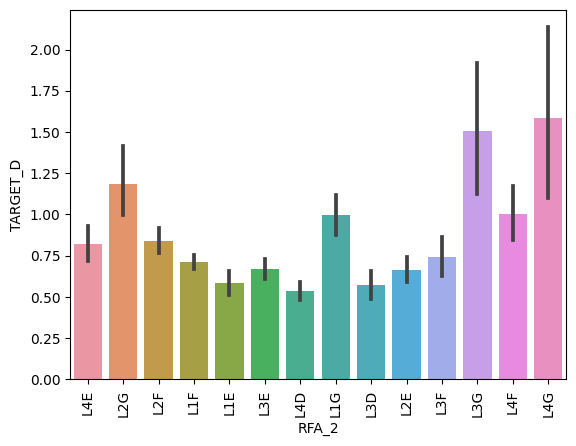

In [31]:
for col in categoricals.columns:
  sns.barplot(x=categoricals[col], y=data["TARGET_D"])
  plt.xticks(rotation=90)
  plt.show()

#### Checking Relationships - Classification

In the previous cells, we saw how to check relationships, considering the *regression* part of the problem. Now let's go deeper into the business case and analyze the relationships for the *classification* part of the problem.

CONTROLN    0.013165
dtype: float64


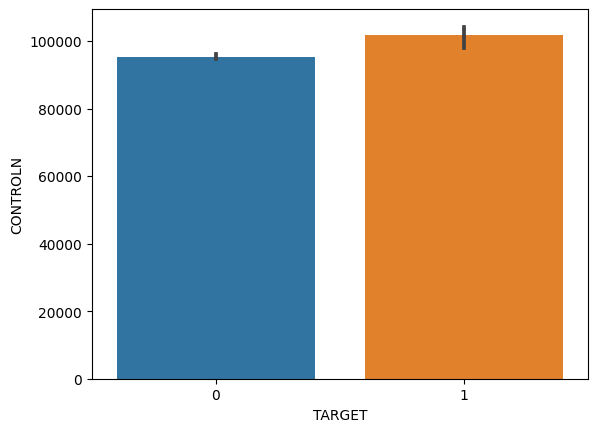

INCOME    0.009856
dtype: float64


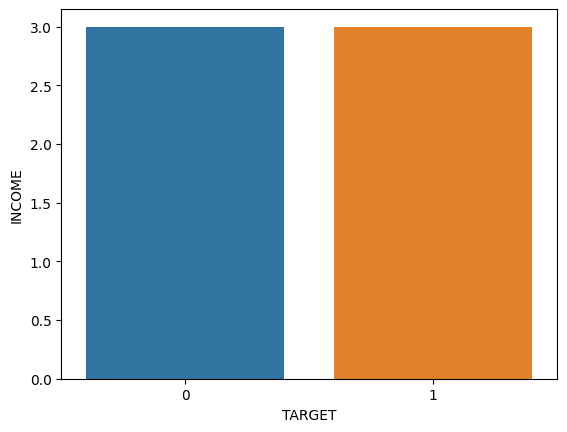

HV1    0.025012
dtype: float64


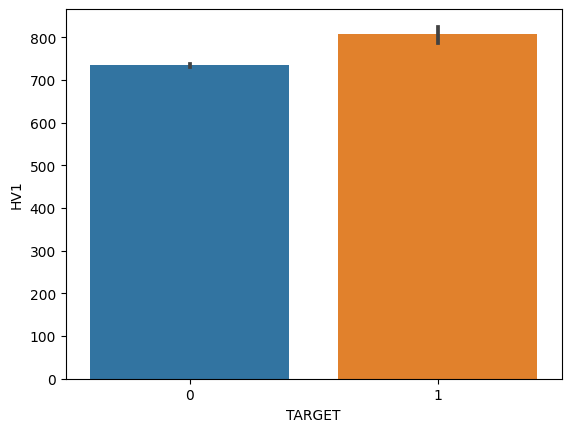

HV2    0.025607
dtype: float64


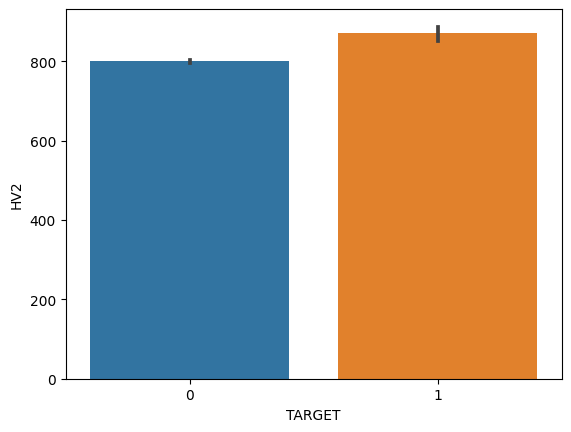

HV3    0.020191
dtype: float64


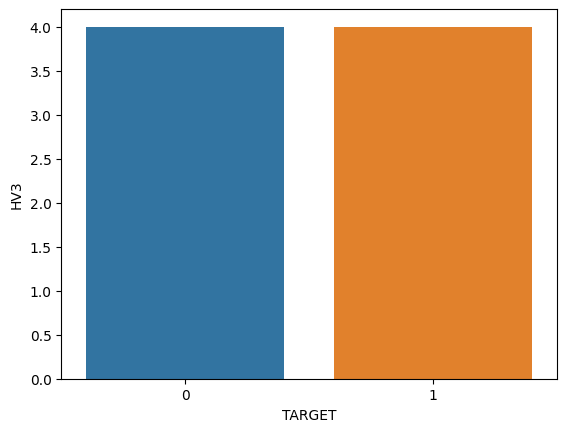

HV4    0.020085
dtype: float64


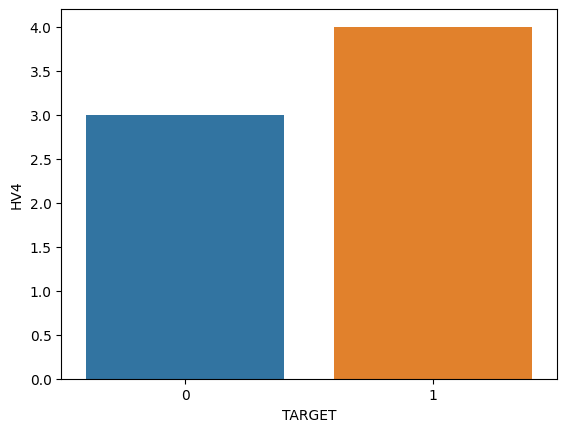

IC1    0.018137
dtype: float64


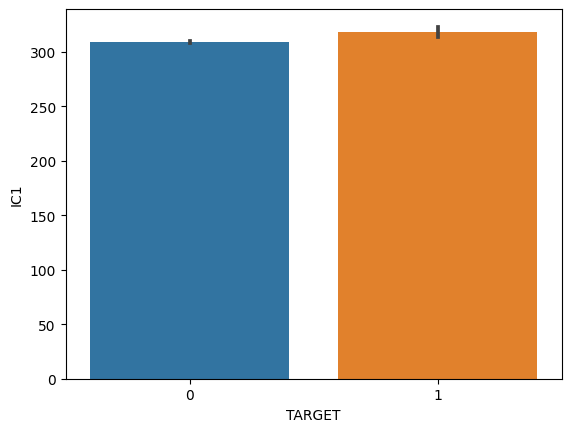

IC2    0.019828
dtype: float64


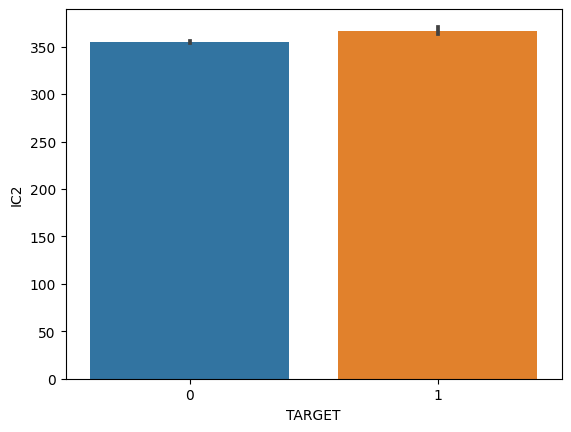

IC3    0.01942
dtype: float64


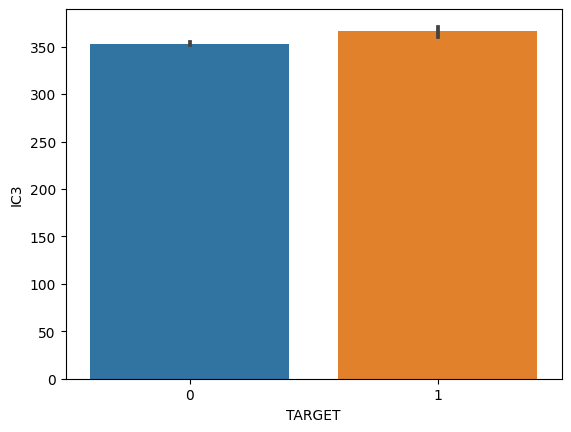

IC4    0.020535
dtype: float64


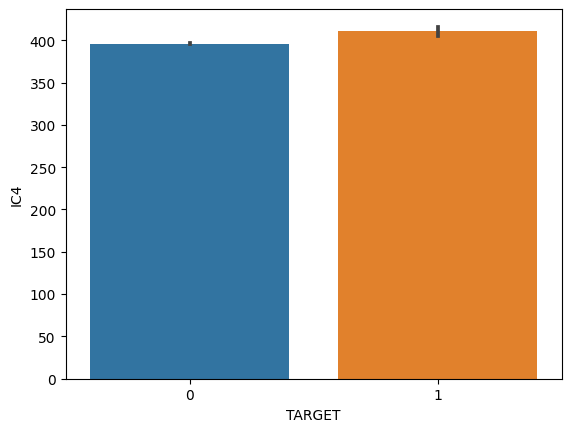

IC5    0.020553
dtype: float64


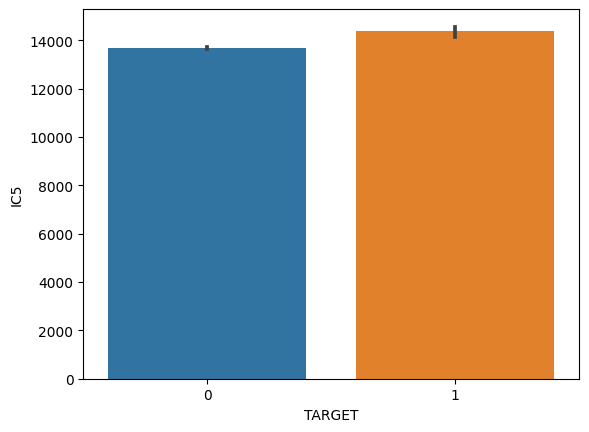

NUMPROM    0.033161
dtype: float64


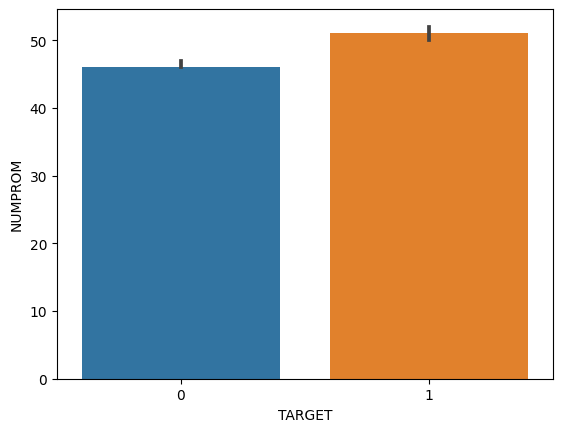

CARDPROM    0.032467
dtype: float64


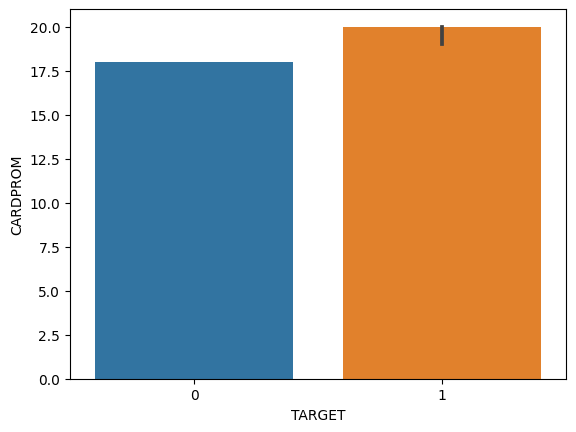

CARDPM12    0.019615
dtype: float64


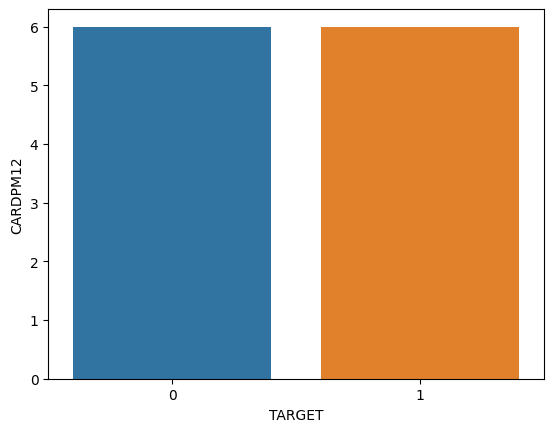

NUMPRM12    0.018639
dtype: float64


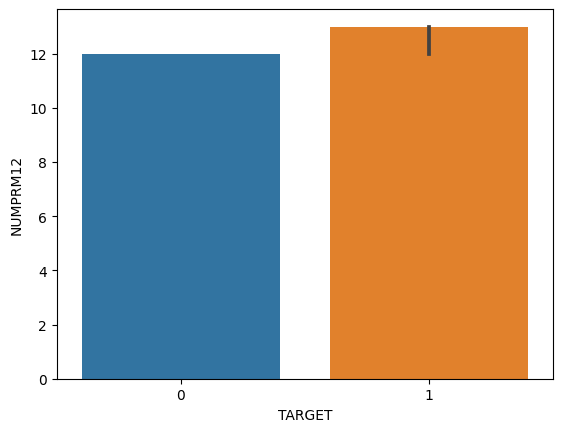

NGIFTALL    0.050896
dtype: float64


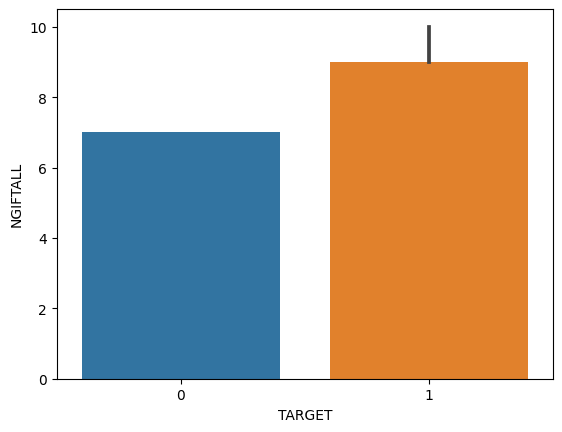

TIMELAG   -0.007838
dtype: float64


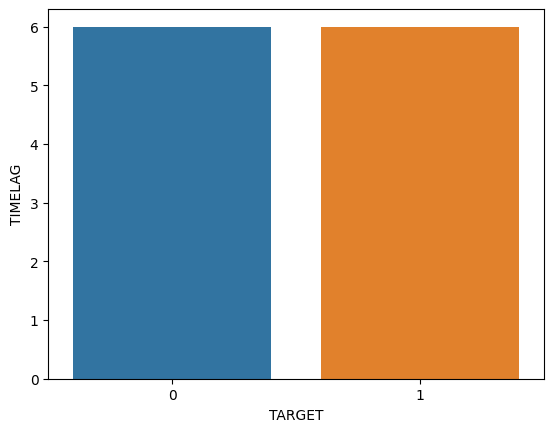

LASTGIFT   -0.035526
dtype: float64


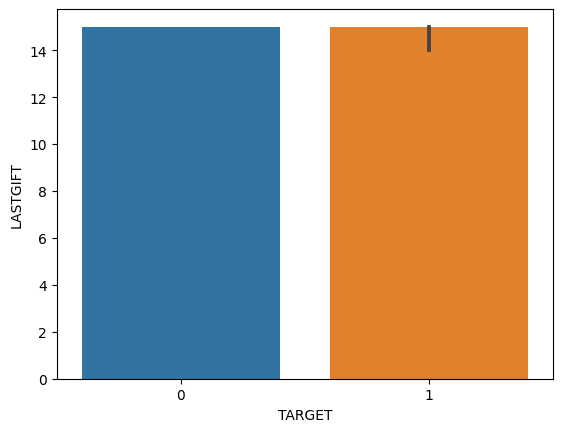

AVGGIFT   -0.032444
dtype: float64


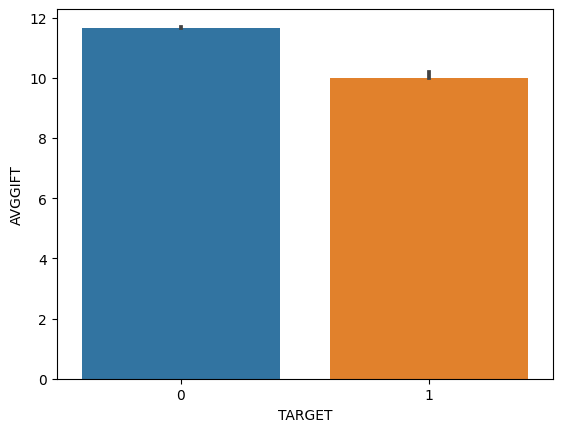

TARGET    1.0
dtype: float64


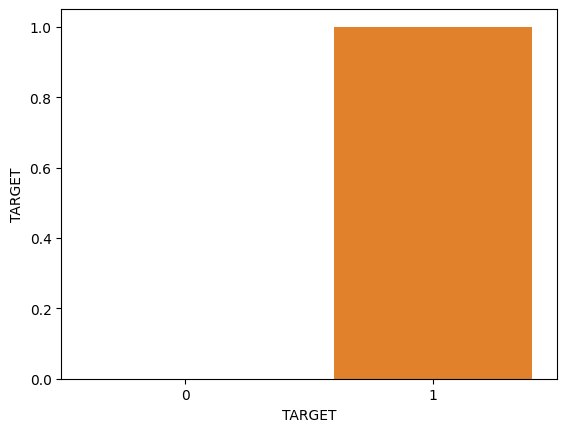

In [32]:
# Numericals:
numericals_cls = numericals.drop("TARGET_D", axis=1)
numericals_cls["TARGET"] = numericals["TARGET_D"].apply(lambda x: 1 if x else 0)

for col in numericals_cls.columns:
  print(numericals_cls[[col]].corrwith(numericals_cls["TARGET"]))
  sns.barplot(x=numericals_cls["TARGET"], y=numericals_cls[col], estimator="median")
  plt.show()

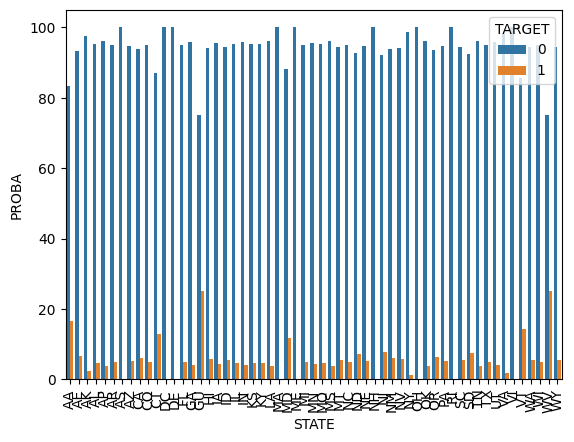

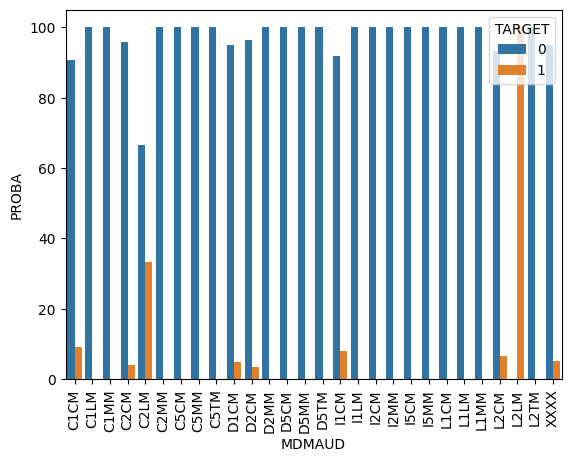

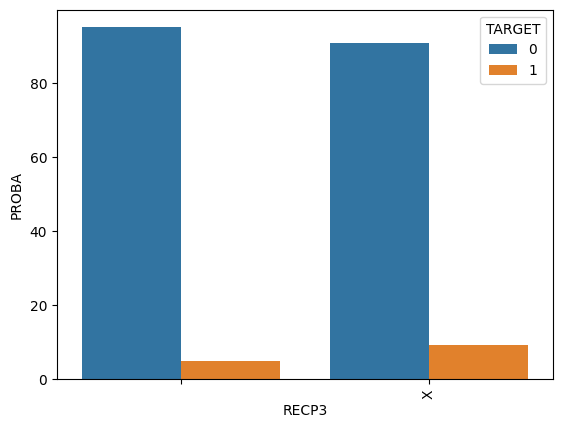

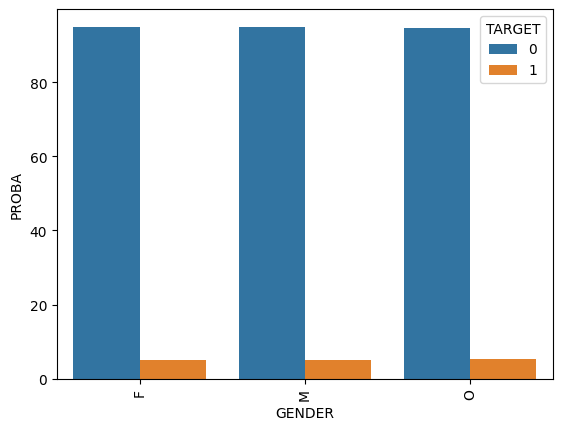

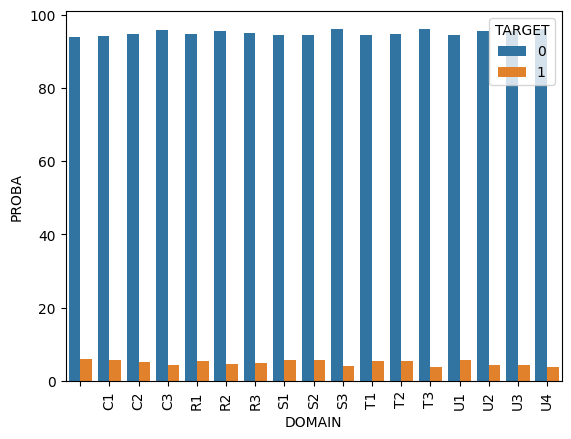

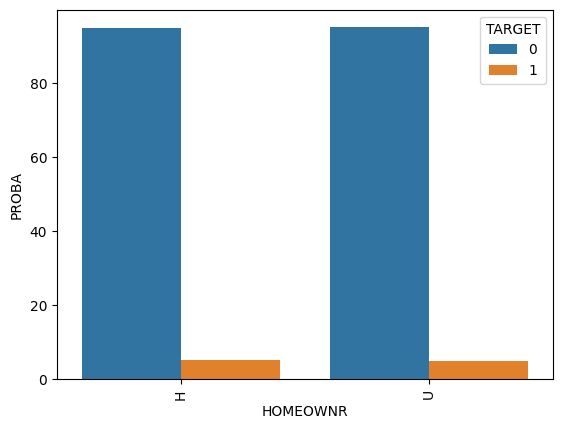

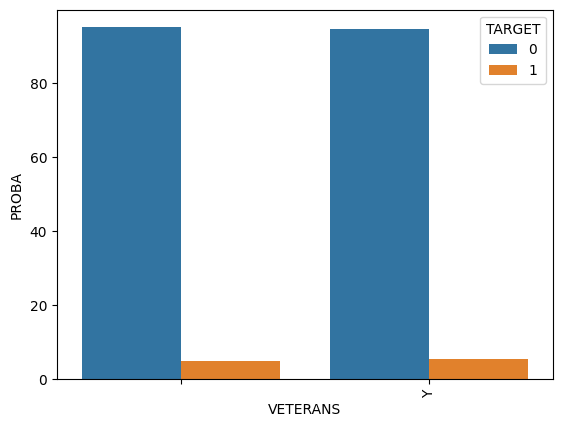

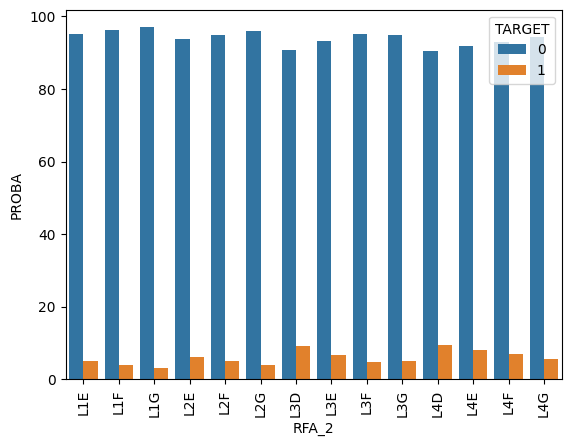

In [33]:
# Categoricals:
categoricals_cls = categoricals.copy()
categoricals_cls["TARGET"] = data["TARGET_D"].apply(lambda x: 1 if x else 0)

for col in categoricals_cls.columns[:-1]:
  # Calculate the percentage of zeros and ones for each category
  percentage_data = categoricals_cls.groupby(col)['TARGET'].value_counts(normalize=True).unstack() * 100

  # Reset the index to have 'col' back as a column
  percentage_data = percentage_data.reset_index()

  # Melt the DataFrame to have 'col' as the identifier variable
  percentage_data = percentage_data.melt(id_vars=col, var_name='TARGET', value_name='PROBA')

  # Plot the relationship using barplot
  sns.barplot(x=percentage_data[col], y=percentage_data['PROBA'], hue=percentage_data['TARGET'])

  plt.xticks(rotation=90)
  plt.show()

**Insight**: larget spikes on the left (orange) bars show categories with higher probability of donations.

##### Checking for statistical relevance
There is one small problem from analyzing relationships using only the plots above: we are calculating averages but we are not sure if these results are statistically relevant. Basically, we don't know if these results will happen often or if they happened by chance.

We can use Chi-square test to check:

In [34]:
from scipy.stats import chi2_contingency

for col in categoricals_cls.columns:
    data_crosstab = pd.crosstab(categoricals_cls[col], categoricals_cls["TARGET"], margins=True)
    stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
    print(col, round(p_value, 4))

STATE 0.1127
MDMAUD 0.9953
RECP3 0.0
GENDER 0.9687
DOMAIN 0.0013
HOMEOWNR 0.6905
VETERANS 0.2174
RFA_2 0.0
TARGET 0.0


**Insight:** p_values lower than 0.05 confirms the statistical significance of the relationships observed with a confidence of 95%. This doesn't mean, for example, that MDMAUD is not an important predictive feature, it means that we don't have enough data to prove that the relationship observed is not coincidental.

### Getting a benchmark model

Before trying different scaling techniques and further "improving" our dataset, I like to get a benchmark to compare results and make sure that the changes we do in our dataset is actually improving our model.

For the benchmark model I only deal with the nans and dummify the categoricals:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = pd.get_dummies(data.drop(['CONTROLN', 'TARGET_D'], axis=1))
y = data['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.005640430235500982
MAE: 1.5157205690576092
RMSE: 4.526386878754425


For the first step, we might want to focus on the R2, since it will tell us how well the model fits the data, but don't forget that to really understand the errors from out model, we will also need other metrics, such as MAE and RMSE.

<Axes: xlabel='TARGET_D'>

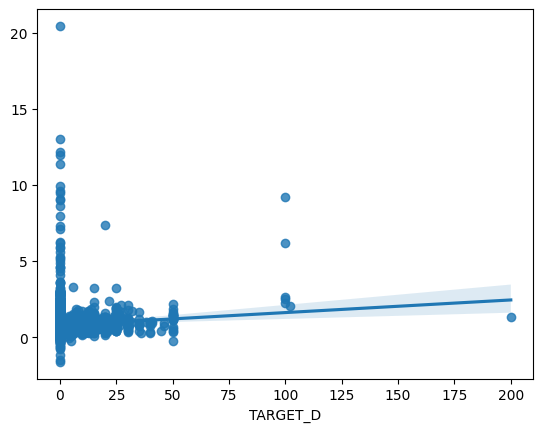

In [36]:
sns.regplot(x=y_test, y=lr.predict(X_test))

In [37]:
# R2 without the zeros:

no_zeros = data[data["TARGET_D"] > 0]
X = pd.get_dummies(no_zeros.drop(['CONTROLN', 'TARGET_D'], axis=1))
y = no_zeros['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.6027055175206844
MAE: 4.4503104302902985
RMSE: 7.686735450240652


<Axes: xlabel='TARGET_D'>

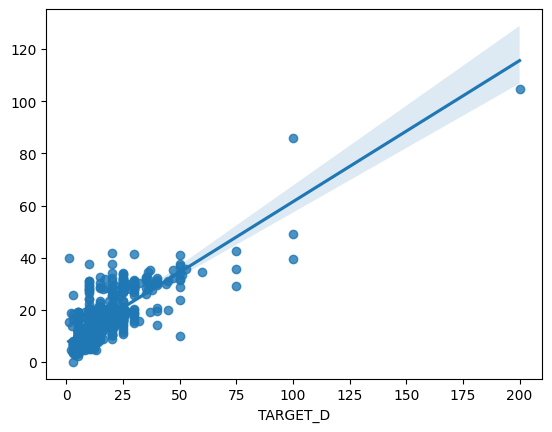

In [38]:
sns.regplot(x=y_test, y=lr.predict(X_test))

In [39]:
# If we removed outliers:

no_zeros = data[(data["TARGET_D"] < 50) & (data["TARGET_D"] > 0)].set_index("CONTROLN")
X = pd.get_dummies(no_zeros.drop(['TARGET_D'], axis=1))
y = no_zeros['TARGET_D']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print("R2:", lr.score(X_test, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test), y_test, squared=False))

R2: 0.5118332109227293
MAE: 3.828416936207954
RMSE: 5.598333655247531


<Axes: xlabel='TARGET_D'>

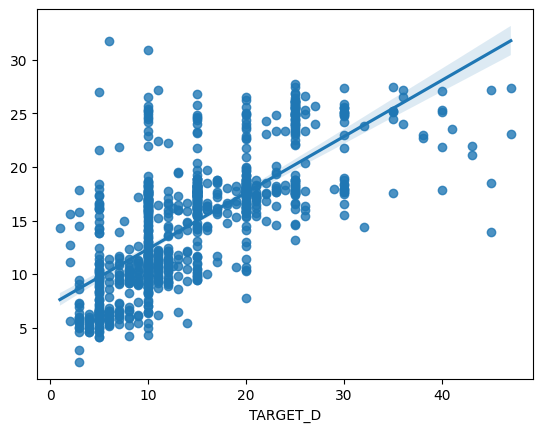

In [40]:
sns.regplot(x=y_test, y=lr.predict(X_test))

**Early conclusions:**
* Apparently, a big problem for this linear regression model is the huge amount of zeros we have, without them we could have decent results;
* Considering the business case, we can make this into a classification problem, where instead of predicting the amount donated, we try to predict if it was donates or not. If predicting the amount is important for the business and depending on how well we can train the classification algorithm, we could train a regression model for those datapoints where a donation is predicted.
* We might want to try other models rather then linear regression (research on zero-inflated models).

### Feature Engineering
Before deciding on dropping or not the outliers, make sure it makes sense for your business case.
Also, it might be a good idea to try scaling techniques that reduces the gaps between values, such as log or boxcox. These techniques might "smoothen out" the outliers.

#### Scaling

Below there are three techniques for scaling, you would pick only one according to your dataset. Scaling helps the model to converge by decreasing the distance between the values, which might make training cheaper, so it might be a nice to have even when the model doesn't require it. Besides improving model computational performance, it might also increase the test metrics.

In [41]:
# considering my early conclusions, let's focus on the rows where there was a donation:
data1 = data[data["TARGET_D"] > 0]

# apply log transformation on numerical values, since it will make the 'outliers' interval smaller
# because we have a lot of zeros, and log of zero is undefined, we will add one to all values before scaling

numericals_log = data1.select_dtypes(np.number)
numericals_log = numericals_log.applymap(lambda x: np.log(x+1))

Why log? Easier to see skewed/exponential data, since the log is the inverse of the exponential. Also, it decreases variability.


<Axes: xlabel='TARGET_D', ylabel='Density'>

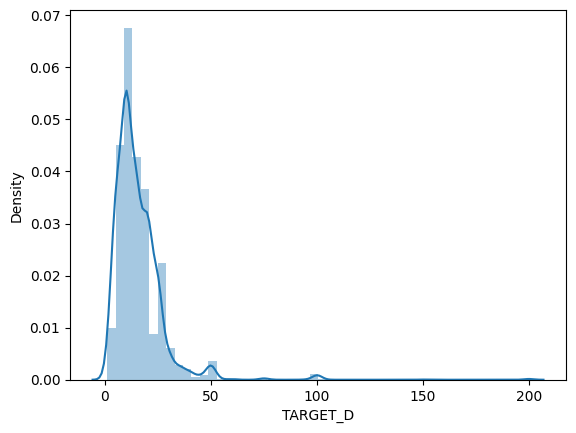

In [42]:
# before scaling:
sns.distplot(data[data['TARGET_D'] > 0]['TARGET_D'])

<Axes: xlabel='TARGET_D', ylabel='Density'>

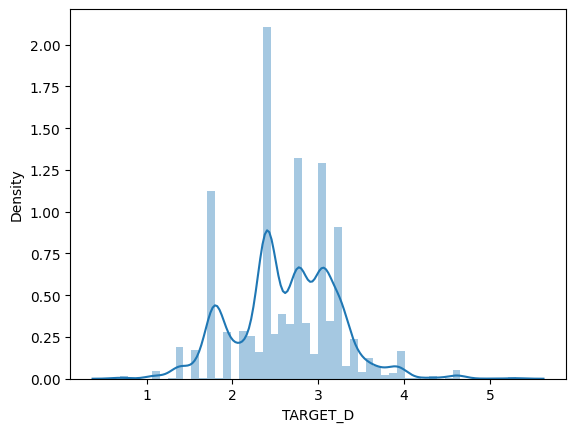

In [43]:
# after scaling:
sns.distplot(numericals_log['TARGET_D'])

**Disclaimer:** I filtered out the zeros from the two plots above so we could see the effect on the distribution of the column.

##### Standardization/Standard Scaler

For each column, each value in the column is subtracted by the mean of the column and then divided by the standard deviation.

Works row wise, so it takes information from the whole column. It is wise to do the train/test split beforehand.

You will .fit() on the training set and then .transform() both (train and test).

In [44]:
from sklearn.preprocessing import StandardScaler
import pickle

numericals_ = data1.select_dtypes(np.number)

X = numericals_.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = numericals_["TARGET_D"]

X_train_num, X_test_num, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Pickle - you'll use it at least for these steps:
# to save the scaler
# to save the encoder
# to save the model

X_transformer = StandardScaler()
X_transformer.fit(X_train_num)

# saving in a pickle
with open('/content/drive/MyDrive/Ironhack/dapt_rmt_may_23/unit 4/std_transformer.pickle', 'wb') as file:
    pickle.dump(X_transformer, file)

# loading from a pickle
with open('/content/drive/MyDrive/Ironhack/dapt_rmt_may_23/unit 4/std_transformer.pickle', 'rb') as file:
    loaded_transformer = pickle.load(file)

X_train_std = loaded_transformer.transform(X_train_num)
X_test_std = loaded_transformer.transform(X_test_num)

##### Normalizer

For each column, each value is divided by the magnitude of the column. The magnitude is calculated as the euclidean distance.

It is calculated column wise, so it takes the values of a whole row to calculate. It is wise to do the X/y split beforehand.

When using Normalizer() you might lose considerable amount of information in the dummified columns. So it might be a good idea to take the categorical columns out before scaling, and then concatenating them together again, but watch out because that too will have consequences to your model.

In [45]:
from sklearn.preprocessing import Normalizer

X = numericals_.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = numericals_["TARGET_D"]

transformer = Normalizer()
x_normalized = transformer.fit_transform(X)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(x_normalized, y, test_size=0.20, random_state=42)

**REMEMBER:** if you scaled your data to train the model, you'll have to apply the same scale to the new data you'll be getting the predictions from.

**ALSO:** you might need to un-scale it for better readability (specially if you scaled the target variable).

Some more clarification on where to use which [here](https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048).

##### Thoughts after scaling:
At this point it's early to say which scaling technique works best. After preparing the categorical variables we can test our different scaling techniques and compare with the metrics from the models we train.

OBS.: Document your work or you'll get lost in it :)

Now let's check which scaling technique is best for our regression model:

In [46]:
# With Log scaling:

X = numericals_log.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = numericals_log['TARGET_D']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y, test_size=0.20, random_state=42)

lr = LinearRegression()
lr.fit(X_train_log, y_train_log)
print("R2:", lr.score(X_test_log, y_test_log))
print("MAE:", mean_absolute_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log)))
print("RMSE:", mean_squared_error(np.exp(lr.predict(X_test_log)), np.exp(y_test_log), squared=False))

R2: 0.6211659136644194
MAE: 4.18774847417334
RMSE: 8.406792685934414


<Axes: xlabel='TARGET_D'>

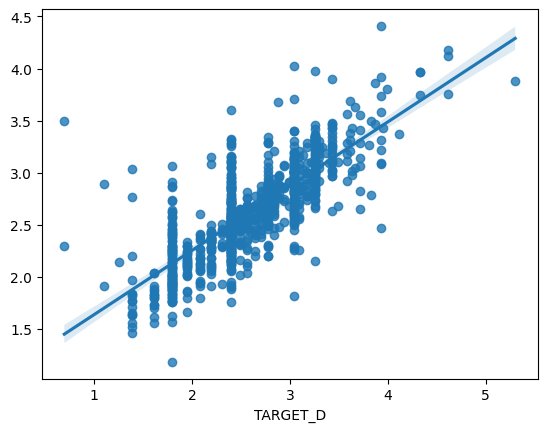

In [47]:
sns.regplot(x=y_test_log, y=lr.predict(X_test_log))

In [48]:
# With StandardScaler:

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_std), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_std), y_test, squared=False))

R2: 0.6385381981891673
MAE: 4.912817320916006
RMSE: 7.331905726452793


<Axes: xlabel='TARGET_D'>

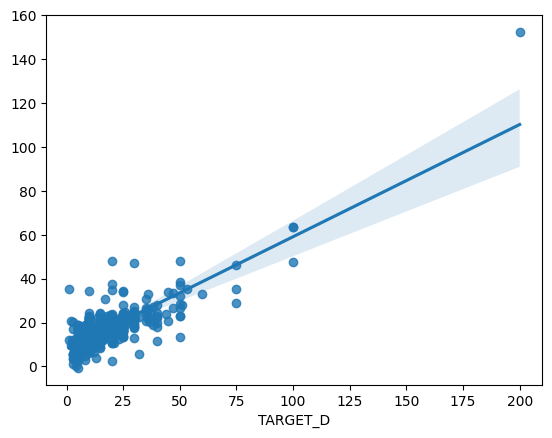

In [49]:
sns.regplot(x=y_test, y=lr.predict(X_test_std))

In [50]:
# With Normalizer:

lr = LinearRegression()
lr.fit(X_train_norm, y_train)
print("R2:", lr.score(X_test_norm, y_test))
print("MAE:", mean_absolute_error(lr.predict(X_test_norm), y_test))
print("RMSE:", mean_squared_error(lr.predict(X_test_norm), y_test, squared=False))

R2: -0.008192339400324933
MAE: 7.69792328378905
RMSE: 12.244959814763915


<Axes: xlabel='TARGET_D'>

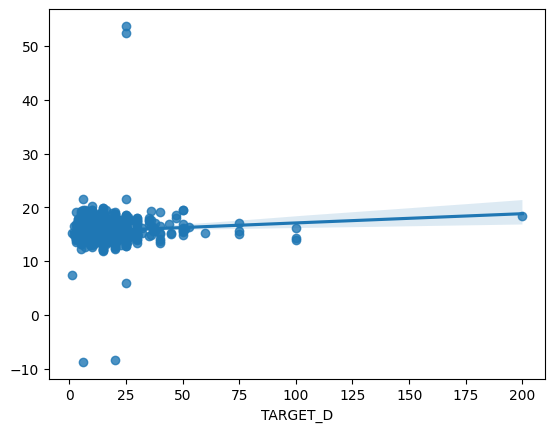

In [51]:
sns.regplot(x=y_test, y=lr.predict(X_test_norm))

For now, we can assume that the best scaling technique for this dataset would be Log or StandardScaler (depending on other metrics such as MAE and RMSE).

#### Feature Engineering Categorical Variables

In this step we will check if it is possible to reduce the amount of columns generated by the encoding of the categorical variables using different techniques.

In [52]:
# A quick peek at categorical variables:

for col in data.select_dtypes('object'):
  display(data[col].value_counts())
  print()

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: STATE, dtype: int64

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

     93395
X     2017
Name: RECP3, dtype: int64

F    51277
M    39094
O     5041
Name: GENDER, dtype: int64

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

     84986
Y    10426
Name: VETERANS, dtype: int64

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

##### Bucketing

When we have too many categories, and some have low occurrence, we can bucket them into one category. We already bucketed HOMEOWNR and GENDER when dealing with the Nans.

In [53]:
# just taking a look at the categories and counts, making a series to work with later:
states_count = pd.Series(data['STATE'].value_counts(), name='counts')
states_count

CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: counts, dtype: int64

In [54]:
# using the series I created above to make a list with the categories that have low accurrence:
group_states = states_count[states_count < 1000].index
group_states

Index(['MS', 'NV', 'NM', 'NE', 'UT', 'ID', 'MT', 'HI', 'SD', 'WY', 'AK', 'ND',
       'AP', 'NY', 'VA', 'OH', 'PA', 'MD', 'NJ', 'MA', 'CT', 'AA', 'AE', 'ME',
       'NH', 'VT', 'RI', 'VI', 'WV', 'GU', 'DE', 'DC', 'AS'],
      dtype='object')

In [55]:
data['STATE'] = data['STATE'].apply(lambda x: 'other' if x in group_states else x)
data['STATE'].value_counts()

CA       17343
FL        8376
TX        7535
other     7288
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
TN        2492
AZ        2407
OR        2183
MN        2175
CO        2032
SC        1759
AL        1705
KY        1620
OK        1617
LA        1594
KS        1294
IA        1271
AR        1020
Name: STATE, dtype: int64

In [56]:
# Now let's check MDMAUD:
data['MDMAUD'].value_counts()

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [57]:
data[(data['MDMAUD'] != 'XXXX') & (data['TARGET_D'] > 0)][["CONTROLN", "MDMAUD", "TARGET_D"]].sort_values('TARGET_D', ascending=False)

,CONTROLN,MDMAUD,TARGET_D
33804,185080,C1CM,200.0
90715,12573,L2CM,102.0
11554,14064,C1CM,100.0
20247,6183,I1CM,100.0
43126,12330,C1CM,100.0
54521,185052,I1CM,100.0
87049,12361,I1CM,100.0
53400,12312,C1CM,95.0
75526,5742,C1CM,75.0
94040,7402,D1CM,75.0


**Potencially Important Insight:** apparently, the few occurrences of MDMAUD that are different then 'XXXX' comes from high amount donors.

So, we can bucket them into 'XXXX' and 'other' to simplify the information for the model:

In [58]:
data['MDMAUD'] = data['MDMAUD'].apply(lambda x: 'other' if x != 'XXXX' else x)
data['MDMAUD'].value_counts()

XXXX     95118
other      294
Name: MDMAUD, dtype: int64

##### Manual Encoding
We can also do our ouw manual encoding, specially when the categorical column contains some sort of code.

In [59]:
data['DOMAIN'].value_counts()

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [60]:
# because we have only two characters for each value in DOMAIN, we can simply:
data_final = data.drop("DOMAIN", axis=1)
data_final['DOMAIN_1'] = data['DOMAIN'].apply(lambda x: x[0])
data_final['DOMAIN_2'] = data['DOMAIN'].apply(lambda x: int(x[1]) if x != " " else 0)
data_final[["DOMAIN_1", "DOMAIN_2"]]  # later we can use pd.get_dummies

,DOMAIN_1,DOMAIN_2
0,T,2
1,S,1
2,R,2
3,R,2
4,S,2
...,...,...
95407,C,2
95408,C,1
95409,C,3
95410,C,1


###### Another way to get to similar result, if you had long sequence of characters for each value in DOMAIN:

In [61]:
domains = data['DOMAIN'].unique()
domains

array(['T2', 'S1', 'R2', 'S2', 'T1', 'R3', 'U1', 'C2', 'C1', 'U3', ' ',
       'R1', 'U2', 'C3', 'U4', 'S3', 'T3'], dtype=object)

In [62]:
letters = set([i[0] for i in domains if i != ' '])
letters

{'C', 'R', 'S', 'T', 'U'}

In [63]:
data_dom = pd.DataFrame(columns=list(letters)+["number"])
data_dom

,S,U,R,C,T,number


In [64]:
data_dom['DOMAIN'] = data["DOMAIN"]
data_dom

,S,U,R,C,T,number,DOMAIN
0,NaN,NaN,NaN,NaN,NaN,NaN,T2
1,NaN,NaN,NaN,NaN,NaN,NaN,S1
2,NaN,NaN,NaN,NaN,NaN,NaN,R2
3,NaN,NaN,NaN,NaN,NaN,NaN,R2
4,NaN,NaN,NaN,NaN,NaN,NaN,S2
...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,C2
95408,NaN,NaN,NaN,NaN,NaN,NaN,C1
95409,NaN,NaN,NaN,NaN,NaN,NaN,C3
95410,NaN,NaN,NaN,NaN,NaN,NaN,C1


In [65]:
for col in data_dom.columns[:-2]:
  data_dom[col] = data_dom['DOMAIN'].apply(lambda x: 1 if col in x else 0)

data_dom['number'] = data_dom['DOMAIN'].apply(lambda x: x[1] if len(x) > 1 else 0)
data_dom = data_dom.drop("DOMAIN", axis=1)
data_dom

,S,U,R,C,T,number
0,0,0,0,0,1,2
1,1,0,0,0,0,1
2,0,0,1,0,0,2
3,0,0,1,0,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
95407,0,0,0,1,0,2
95408,0,0,0,1,0,1
95409,0,0,0,1,0,3
95410,0,0,0,1,0,1


###### Let's do the same for RFA_2:

In [66]:
data['RFA_2'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

In [67]:
# because we will only use two characters for each value in RFA_2, we can simply:
data_final = data_final.drop("RFA_2", axis=1)
data_final['RFA_2_1'] = data['RFA_2'].apply(lambda x: int(x[1]))
data_final['RFA_2_2'] = data['RFA_2'].apply(lambda x: x[2])
data_final[["RFA_2_1", "RFA_2_2"]]  # later we can use pd.get_dummies

,RFA_2_1,RFA_2_2
0,4,E
1,2,G
2,4,E
3,4,E
4,2,F
...,...,...
95407,1,G
95408,1,F
95409,3,E
95410,4,F


###### Another way to get to similar result, if you had long sequence of characters for each value in RFA_2:

In [68]:
rfa = data['RFA_2'].unique()
rfa_str = ''.join(rfa)
rfa_str

'L4EL2GL2FL1FL1EL3EL4DL1GL3DL2EL3FL3GL4FL4G'

In [69]:
rfa_unique = set(rfa_str)
rfa_unique

{'1', '2', '3', '4', 'D', 'E', 'F', 'G', 'L'}

In [70]:
data_rfa = pd.DataFrame(columns=list(rfa_unique))
data_rfa['RFA_2'] = data["RFA_2"]
data_rfa

,4,D,1,F,L,2,E,3,G,RFA_2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4E
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4E
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4E
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2F
...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1G
95408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1F
95409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L3E
95410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L4F


In [71]:
for col in data_rfa.columns:
  data_rfa[col] = data_rfa['RFA_2'].apply(lambda x: 1 if col in x else 0)

data_rfa = data_rfa.drop("RFA_2", axis=1)
data_rfa

,4,D,1,F,L,2,E,3,G
0,1,0,0,0,1,0,1,0,0
1,0,0,0,0,1,1,0,0,1
2,1,0,0,0,1,0,1,0,0
3,1,0,0,0,1,0,1,0,0
4,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
95407,0,0,1,0,1,0,0,0,1
95408,0,0,1,1,1,0,0,0,0
95409,0,0,0,0,1,0,1,1,0
95410,1,0,0,1,1,0,0,0,0


In [72]:
# We could then concatenate all together:

data_categ = pd.concat([data, data_dom, data_rfa], axis=1)
data_categ = data_categ.drop(['DOMAIN', 'RFA_2'], axis=1)
data_categ

,CONTROLN,STATE,MDMAUD,RECP3,GENDER,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,S,U,R,C,T,number,4,D,1,F,L,2,E,3,G
0,95515,IL,XXXX,,F,0.0,U,479,635,3,2,307,318,349,378,12883,,74,27,6,14,31,4.0,10.0,7.741935,0.0,0,0,0,0,1,2,1,0,0,0,1,0,1,0,0
1,148535,CA,XXXX,,M,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,3,18.0,25.0,15.666667,0.0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
2,15078,NC,XXXX,,M,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,27,12.0,5.0,7.481481,0.0,0,0,1,0,0,2,1,0,0,0,1,0,1,0,0
3,172556,CA,XXXX,,F,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,16,9.0,10.0,6.812500,0.0,0,0,1,0,0,2,1,0,0,0,1,0,1,0,0
4,7112,FL,XXXX,X,F,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,37,14.0,15.0,6.864865,0.0,1,0,0,0,0,2,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,other,XXXX,,M,0.0,U,988,1025,6,6,433,481,499,535,18807,,14,6,5,12,1,6.0,25.0,25.000000,0.0,0,0,0,1,0,2,0,0,1,0,1,0,0,0,1
95408,122706,TX,XXXX,,M,7.0,H,1679,1723,3,3,806,836,802,849,26538,,10,4,3,8,1,6.0,20.0,20.000000,0.0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0
95409,189641,MI,XXXX,X,M,0.0,U,376,377,4,3,263,264,319,345,12178,,33,14,7,17,7,3.0,10.0,8.285714,0.0,0,0,0,1,0,3,0,0,0,0,1,0,1,1,0
95410,4693,CA,XXXX,,F,7.0,H,2421,2459,11,10,552,544,568,556,15948,,127,36,9,31,41,4.0,18.0,12.146341,18.0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0


##### Preparing all categorical columns:

In [73]:
# Dummifying the rest:

data_final = pd.get_dummies(data_final, drop_first=True)
data_final

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,DOMAIN_2,RFA_2_1,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MI,STATE_MN,STATE_MO,STATE_NC,STATE_OK,STATE_OR,STATE_SC,STATE_TN,STATE_TX,STATE_WA,STATE_WI,STATE_other,MDMAUD_other,RECP3_X,GENDER_M,GENDER_O,HOMEOWNR_U,VETERANS_Y,DOMAIN_1_C,DOMAIN_1_R,DOMAIN_1_S,DOMAIN_1_T,DOMAIN_1_U,RFA_2_2_E,RFA_2_2_F,RFA_2_2_G
0,95515,0.0,479,635,3,2,307,318,349,378,12883,74,27,6,14,31,4.0,10.0,7.741935,0.0,2,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
1,148535,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,3,18.0,25.0,15.666667,0.0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,15078,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,27,12.0,5.0,7.481481,0.0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,172556,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,16,9.0,10.0,6.812500,0.0,2,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,7112,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,37,14.0,15.0,6.864865,0.0,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,184568,0.0,988,1025,6,6,433,481,499,535,18807,14,6,5,12,1,6.0,25.0,25.000000,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1
95408,122706,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,1,6.0,20.0,20.000000,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
95409,189641,0.0,376,377,4,3,263,264,319,345,12178,33,14,7,17,7,3.0,10.0,8.285714,0.0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0
95410,4693,7.0,2421,2459,11,10,552,544,568,556,15948,127,36,9,31,41,4.0,18.0,12.146341,18.0,1,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


#### Training Model

Now could be a good point to train some models and compare results:

In [74]:
data_final_nozeros = data_final[data_final["TARGET_D"] > 0]

X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.6167642166051948
MAE: 4.4015565016282086
RMSE: 7.549508773794257


<Axes: ylabel='TARGET_D'>

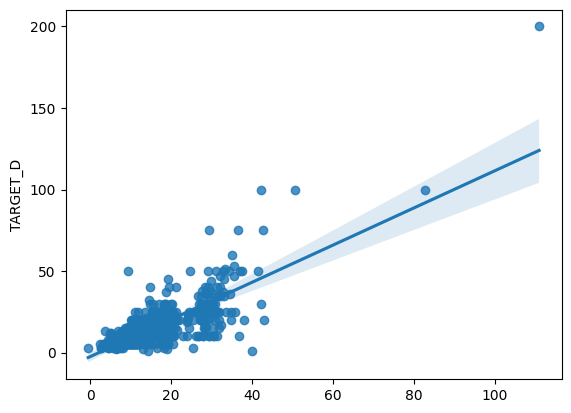

In [75]:
sns.regplot(x=predictions, y=y_test)

##### Quick test without outliers:

In [76]:
data_final_outliers = data_final[(data_final["TARGET_D"] > 0) & (data_final["TARGET_D"] < 80)]

X = data_final_outliers.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_outliers["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.5315522037508758
MAE: 3.9903447758139947
RMSE: 6.212341966268732


<Axes: ylabel='TARGET_D'>

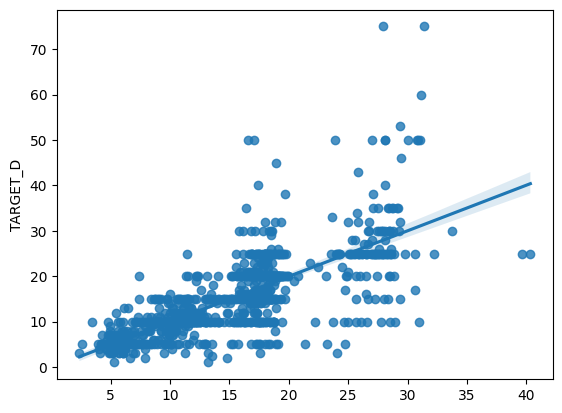

In [77]:
sns.regplot(x=predictions, y=y_test)

**Conclusions:**
* Due to the small difference in metrics between keeping or removing outliers, we'll keep them for now.
* We should spend more time analysing the features and understanding the relationships with the target, but for now let's pretend we are partly satisfied with the result and move on to feature selection.

### Feature Selection
Feature selection can be:
* Adding features to the dataset by gathering them from the data available (gather information outside the dataset we have here);
* Removing features we have in the dataset to reduce noise or avoid multi-colinearity.

OBS.: <br>
*Feature Engineering:* transforming data from your dataset. <br>
*Feature Extraction:* extracting a new column from the existing data. <br>
*Feature Selection:* adding features or discarding the ones you won't need. <br>

##### **Feature Importance**
It is a quick and safe way of removing features that your model didn't need.<br> We will select the features based on the importance calculated by the model itself:

In [78]:
X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.6167642166051948
MAE: 4.4015565016282086
RMSE: 7.549508773794257


Check the documentation of the model to see if they have a **.feature_importance_** attribute, LinearRegression doesn't have it, but we can use the values of the coefficients:

In [79]:
data_importance = pd.Series([abs(i) for i in lr.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

RFA_2_2_G       5.262232
LASTGIFT        4.856180
RFA_2_2_F       2.939577
IC3             2.010155
MDMAUD_other    1.786589
NUMPROM         1.634399
IC4             1.487741
CARDPROM        1.461264
AVGGIFT         1.447323
IC1             1.365694
DOMAIN_1_R      1.206869
DOMAIN_1_C      1.091349
RFA_2_2_E       1.020794
DOMAIN_1_S      1.008073
DOMAIN_1_T      1.003285
RFA_2_1         0.990280
DOMAIN_1_U      0.805605
STATE_GA        0.753325
IC2             0.711507
NGIFTALL        0.696933
NUMPRM12        0.639664
STATE_FL        0.608047
STATE_CA        0.588285
HOMEOWNR_U      0.535010
STATE_TX        0.532076
STATE_CO        0.508084
STATE_WA        0.498634
CARDPM12        0.445323
STATE_MI        0.440862
STATE_SC        0.430472
STATE_MO        0.412689
STATE_other     0.392858
HV1             0.377171
STATE_TN        0.369478
STATE_IL        0.351390
STATE_LA        0.348218
STATE_OR        0.338530
HV3             0.314216
STATE_OK        0.303981
STATE_NC        0.299402


From the above result, we can choose the top *N* columns to train our model and check if the metrics stay similar:

In [80]:
X = data_final_nozeros[data_importance[:10].index]  # data_final_outliers
y = data_final_nozeros["TARGET_D"]  # data_final_outliers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.6199793601454392
MAE: 4.501911490020506
RMSE: 7.517773900699474


<Axes: ylabel='TARGET_D'>

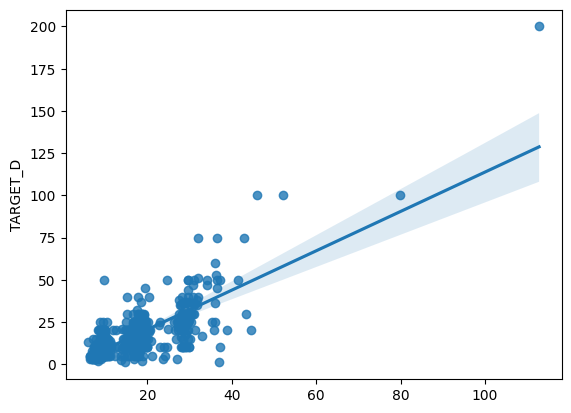

In [81]:
sns.regplot(x=predictions, y=y_test)

**Early Conclusions:** The results got a little better, by removing a few non-important columns we have reduced noise and multi-collinearity. I removed outliers

##### **Correlations:**

In [82]:
# Checking relationship between features and target:
data_final.corr()['TARGET_D'].sort_values(ascending=False)[:50]

TARGET_D        1.000000
LASTGIFT        0.061678
AVGGIFT         0.044299
MDMAUD_other    0.042896
HV2             0.039860
HV1             0.039081
IC5             0.037328
IC4             0.035952
RFA_2_2_G       0.035907
IC2             0.035496
IC3             0.033786
IC1             0.031780
HV3             0.030915
HV4             0.030867
STATE_CA        0.026681
NUMPRM12        0.025134
RECP3_X         0.020673
NUMPROM         0.017337
INCOME          0.016777
CARDPM12        0.016358
CONTROLN        0.013366
DOMAIN_1_S      0.013275
CARDPROM        0.011302
STATE_OR        0.006499
NGIFTALL        0.004899
GENDER_O        0.004647
STATE_WA        0.004573
GENDER_M        0.003989
TIMELAG         0.003979
STATE_CO        0.003580
VETERANS_Y      0.002392
STATE_AZ        0.002159
STATE_SC        0.001565
RFA_2_1         0.000905
STATE_MI        0.000411
DOMAIN_1_U     -0.000197
STATE_other    -0.000373
STATE_FL       -0.001357
DOMAIN_1_T     -0.001841
STATE_TX       -0.001854


In [83]:
# Checking Multi-Colinearity between features:
correlations_matrix = data_final.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,CONTROLN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,DOMAIN_2,RFA_2_1,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MI,STATE_MN,STATE_MO,STATE_NC,STATE_OK,STATE_OR,STATE_SC,STATE_TN,STATE_TX,STATE_WA,STATE_WI,STATE_other,MDMAUD_other,RECP3_X,GENDER_M,GENDER_O,HOMEOWNR_U,VETERANS_Y,DOMAIN_1_C,DOMAIN_1_R,DOMAIN_1_S,DOMAIN_1_T,DOMAIN_1_U,RFA_2_2_E,RFA_2_2_F,RFA_2_2_G
CONTROLN,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INCOME,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV1,0.0,0.0,1.000000,0.993412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV2,0.0,0.0,0.993412,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV3,0.0,0.0,0.000000,0.000000,1.000000,0.941277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HV4,0.0,0.0,0.000000,0.000000,0.941277,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.951252,0.975308,0.929737,0.805823,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC2,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.951252,1.000000,0.955143,0.973616,0.873939,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.975308,0.955143,1.000000,0.971395,0.839304,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IC4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.929737,0.973616,0.971395,1.000000,0.882082,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


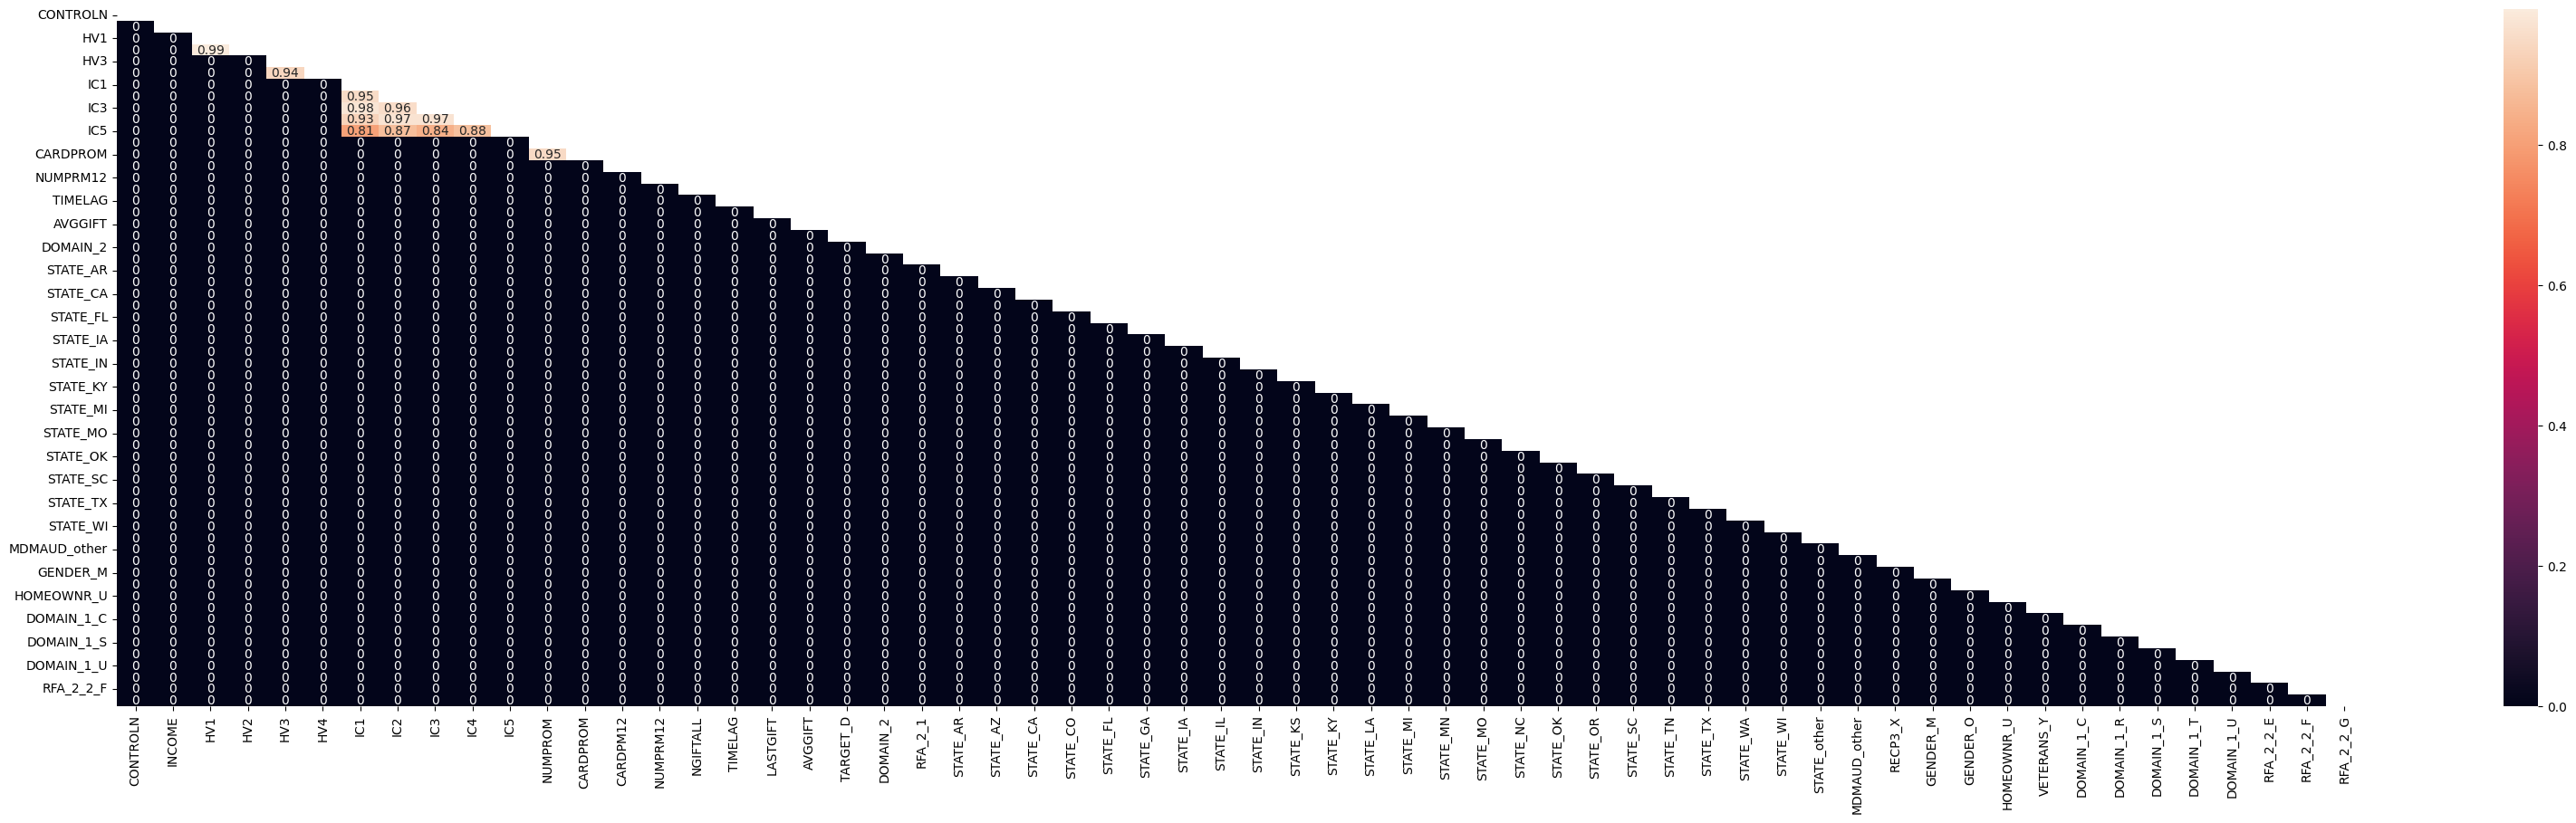

In [84]:
# Trying a heatmap to help visualize:
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(40, 10))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

From the above we could remove columns with high colinearity, such as: HV1, IC3 and CARDPROM.

##### **Chi-Square Test**

Chi-square test is used to determine if there is a significant relationship between two categorical variables. The test is based on a contingency table. The frequency of categories in a variable is compared to the frequencies of categories in another variable.

The order in which frequencies are put in the table does not change the result of the chi-square test, so it won't consider the hierarchy for ordinal categoricals.

Contingency Table:

![](https://i.stack.imgur.com/8YuSA.jpg)

In [85]:
# Contingency Table:
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins=True)
data_crosstab

RFA_2,L1E,L1F,L1G,L2E,L2F,L2G,L3D,L3E,L3F,L3G,L4D,L4E,L4F,L4G,All
DOMAIN,,,,,,,,,,,,,,,
,169,611,299,147,266,134,65,180,97,35,112,105,59,37,2316
C1,260,1921,955,304,733,341,132,465,253,121,234,245,115,66,6145
C2,438,2519,1025,467,956,398,227,693,296,159,472,353,180,81,8264
C3,320,1668,615,311,581,208,168,432,170,56,352,246,114,39,5280
R1,62,446,196,57,164,77,29,122,55,24,51,39,24,12,1358
R2,822,4178,1572,822,1530,610,435,1133,502,195,813,587,299,125,13623
R3,324,1538,450,304,515,186,176,405,151,59,345,217,103,36,4809
S1,435,3809,1953,450,1310,726,212,811,457,219,409,370,226,116,11503
S2,422,2744,1048,426,1048,335,206,718,344,130,439,383,213,74,8530


With the contingency table we can check if these two variables are dependent or independent from each other.

OFC we won't be checking that with our eyes. A nice way to 'measure' the dependency between the variables is a chi-squared test:

In [86]:
from scipy.stats import chi2_contingency

stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
stats, p_value  # the result is a low p_value ( < 0.05), so we can assume relationship between the variables

(1476.8762805879442, 1.4664726998071514e-177)

The p_value is used for hypothesis testing and it can be used to measure dependency between two variables.

A low p_value means that there is significant relationship between two variables.

A reasonable threshold for p_value is 0.05, and it's related to a confidence interval of 95%. But all this is subject for another class :)

**For now:** a p_value below 0.05 means that there is some dependency between two variables, and might indicate that one of them can be dropped without decreasing the metrics of the model.

A more ludicrous example [here](https://statisticsbyjim.com/hypothesis-testing/chi-square-test-independence-example/).

In [87]:
# Applying to all pairs:

pairs = []

for i in data.select_dtypes("object").columns:
  for j in data.select_dtypes("object").columns:
    if i != j:
      data_crosstab = pd.crosstab(data[i], data[j], margins=True)
      stats, p_value, dof, frequencies = chi2_contingency(data_crosstab)
      if (i,j,p_value) not in pairs and (j,i,p_value) not in pairs and p_value < .05:
        pairs.append((i, j, p_value))

sorted_pairs = sorted(pairs, key=lambda x: x[2])
sorted_pairs

[('STATE', 'DOMAIN', 0.0),
 ('GENDER', 'HOMEOWNR', 0.0),
 ('DOMAIN', 'HOMEOWNR', 0.0),
 ('HOMEOWNR', 'VETERANS', 0.0),
 ('RECP3', 'DOMAIN', 2.2011933965764286e-193),
 ('MDMAUD', 'RFA_2', 2.9393670606519984e-192),
 ('DOMAIN', 'RFA_2', 1.4664726998071514e-177),
 ('GENDER', 'VETERANS', 1.6654592673578657e-171),
 ('STATE', 'HOMEOWNR', 2.2074138279757e-147),
 ('HOMEOWNR', 'STATE', 2.2074138279757008e-147),
 ('DOMAIN', 'MDMAUD', 4.41491519951331e-70),
 ('MDMAUD', 'DOMAIN', 4.414915199513561e-70),
 ('RFA_2', 'STATE', 1.3703704800976532e-49),
 ('STATE', 'RFA_2', 1.3703704800978092e-49),
 ('GENDER', 'RFA_2', 6.073483612862809e-47),
 ('GENDER', 'DOMAIN', 4.573494169485686e-30),
 ('GENDER', 'STATE', 3.3816999350179664e-23),
 ('STATE', 'GENDER', 3.381699935018061e-23),
 ('DOMAIN', 'VETERANS', 2.704332880888217e-18),
 ('VETERANS', 'DOMAIN', 2.704332880888258e-18),
 ('RECP3', 'HOMEOWNR', 1.7489267925713216e-12),
 ('VETERANS', 'STATE', 2.448977584862351e-09),
 ('STATE', 'VETERANS', 2.4489775848623868

In [88]:
from collections import Counter

Counter([i for i, j, p in sorted_pairs] + [j for i, j, p in sorted_pairs])

Counter({'STATE': 9,
         'GENDER': 6,
         'DOMAIN': 9,
         'HOMEOWNR': 7,
         'RECP3': 3,
         'MDMAUD': 3,
         'RFA_2': 8,
         'VETERANS': 7})

From the above, we can see that STATE and DOMAIN, for example, have significant relationship with 9 other categorical features, so removing them might not affect negativelly our model. It is still not perfect and there is a risk that the categorical columns were not collinear.

##### **VIF - Variance Inflation Factor**

VIF is used to calculate multicolinearity between features, helping on the feature selection. For that purpose, you won't have the target variable in the calculation. You can use it for numerical features and encoded/dummified categorical features.

While the correlation methods we've seen so far (pearson, spearman, etc) calculates the correlation of one variable vs another, VIF checks correlation of many variables vs another.

VIF uses variation, which is calculated using the standard deviation, to return a measure of "explainability" of several features against another. How much of the spread of values from that variable can be "explained" or "predicted" by the other variables.

It is calculated through linear regression. For each feature you can imagine that a linear regression is made where that feature is considered the "target variable" and the other variables are considered the features.

The rule of thumb is that features with VIF above 10 could be dropped without decreasing the metrics of your model, but I don't buy it... so make sure you always test your metrics before and after dropping the columns :)

**IMPORTANT:** Everytime you drop a column, you need to re-calculate the VIF, because it will affect the factors from all the other columns.

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# vif uses OLS to calculate the factor, so we don't have the intercept
# that's why we need to assign it:
vif = add_constant(data_final)

# To remove multicolinearity automatically:
threshold = 10

while True:
    # calculates vif
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    # checks if the highest vif is bigger than the threshold
    if max(values) > threshold:
        # finds the column that has the maximum vif
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        # drops that column
        vif = vif.drop(column_name, axis=1)
    else:
        break

vif

,0
TARGET_D,1.007812
VETERANS_Y,1.034801
TIMELAG,1.054781
GENDER_M,1.059184
GENDER_O,1.074063
RECP3_X,1.214203
MDMAUD_other,1.242296
STATE_AR,1.619128
HOMEOWNR_U,1.667185
STATE_IA,1.736621


,0
TARGET_D,1.007808
VETERANS_Y,1.034783
TIMELAG,1.054774
GENDER_M,1.059183
GENDER_O,1.074025
RECP3_X,1.214192
MDMAUD_other,1.242247
STATE_AR,1.619122
HOMEOWNR_U,1.664869
STATE_IA,1.735806


,0
TARGET_D,1.007808
VETERANS_Y,1.034750
TIMELAG,1.054759
GENDER_M,1.059027
GENDER_O,1.073825
RECP3_X,1.214182
MDMAUD_other,1.242163
STATE_AR,1.619121
HOMEOWNR_U,1.664618
STATE_IA,1.735246


,0
TARGET_D,1.007752
VETERANS_Y,1.034705
TIMELAG,1.052425
GENDER_M,1.058465
GENDER_O,1.073812
RECP3_X,1.207444
MDMAUD_other,1.233480
STATE_AR,1.617763
HOMEOWNR_U,1.664451
STATE_IA,1.735004


,0
TARGET_D,1.007728
VETERANS_Y,1.034704
TIMELAG,1.052425
GENDER_M,1.058377
GENDER_O,1.073802
RECP3_X,1.207377
MDMAUD_other,1.233449
STATE_AR,1.617704
HOMEOWNR_U,1.664249
STATE_IA,1.734500


,0
TARGET_D,1.007703
VETERANS_Y,1.034639
TIMELAG,1.052341
GENDER_M,1.058332
GENDER_O,1.073800
RECP3_X,1.207376
MDMAUD_other,1.233424
STATE_AR,1.617194
HOMEOWNR_U,1.664100
STATE_IA,1.734494


,0
TARGET_D,1.007662
VETERANS_Y,1.034638
TIMELAG,1.052334
GENDER_M,1.058312
GENDER_O,1.073707
STATE_AR,1.131458
STATE_KS,1.172592
STATE_LA,1.187071
STATE_IA,1.196123
STATE_CO,1.196378


,0
TARGET_D,1.007652
VETERANS_Y,1.034635
TIMELAG,1.052289
GENDER_M,1.058306
GENDER_O,1.073694
STATE_AR,1.131154
STATE_KS,1.171565
STATE_LA,1.185850
STATE_IA,1.195351
STATE_CO,1.196366


,0
TARGET_D,1.007622
VETERANS_Y,1.034628
TIMELAG,1.052281
GENDER_M,1.058303
GENDER_O,1.073687
STATE_AR,1.131032
STATE_KS,1.171178
STATE_LA,1.185172
STATE_CO,1.194012
STATE_IA,1.195223


,const,CONTROLN,INCOME,HV1,HV4,IC1,IC5,CARDPROM,CARDPM12,NUMPRM12,NGIFTALL,TIMELAG,LASTGIFT,AVGGIFT,TARGET_D,DOMAIN_2,RFA_2_1,STATE_AR,STATE_AZ,STATE_CO,STATE_FL,STATE_GA,STATE_IA,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MI,STATE_MN,STATE_MO,STATE_NC,STATE_OK,STATE_OR,STATE_SC,STATE_TN,STATE_TX,STATE_WA,STATE_WI,STATE_other,MDMAUD_other,RECP3_X,GENDER_M,GENDER_O,HOMEOWNR_U,VETERANS_Y,DOMAIN_1_C,DOMAIN_1_R,DOMAIN_1_T,DOMAIN_1_U,RFA_2_2_E,RFA_2_2_F,RFA_2_2_G
0,1.0,95515,0.0,479,2,307,12883,27,6,14,31,4.0,10.0,7.741935,0.0,2,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1.0,148535,6.0,5468,10,1088,36175,12,6,13,3,18.0,25.0,15.666667,0.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.0,15078,3.0,497,1,251,11576,26,6,14,27,12.0,5.0,7.481481,0.0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
3,1.0,172556,1.0,1000,1,386,15130,27,6,14,16,9.0,10.0,6.812500,0.0,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,1.0,7112,3.0,576,3,240,9836,43,10,25,37,14.0,15.0,6.864865,0.0,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1.0,184568,0.0,988,6,433,18807,6,5,12,1,6.0,25.0,25.000000,0.0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
95408,1.0,122706,7.0,1679,3,806,26538,4,3,8,1,6.0,20.0,20.000000,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
95409,1.0,189641,0.0,376,3,263,12178,14,7,17,7,3.0,10.0,8.285714,0.0,3,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0
95410,1.0,4693,7.0,2421,10,552,15948,36,9,31,41,4.0,18.0,12.146341,18.0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [90]:
# We migth be able to remove the following columns:
[col for col in data_final.columns if col not in vif]

['HV2', 'HV3', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'STATE_CA', 'DOMAIN_1_S']

In [91]:
# Manually, just to see what the code is doing:

vif_ = pd.DataFrame(index=vif.columns)

vif_["VIF Factor"] = [round(variance_inflation_factor(np.array(vif), i),2)
                     for i in range(len(vif.columns))]

vif_.sort_values("VIF Factor")

,VIF Factor
TARGET_D,1.01
VETERANS_Y,1.03
TIMELAG,1.05
GENDER_M,1.06
GENDER_O,1.07
STATE_AR,1.13
STATE_KS,1.17
STATE_CO,1.19
STATE_LA,1.19
STATE_IA,1.20


From the above techniques, I would go for VIF for now, since it's reasonably simple to use and works for numericals and categoricals. Also it is more concrete on terms of finding multicollinearity if compared to the chi-square test. According to VIF, the columns to remove would be: ['HV2','HV3','HV4','IC1','IC2','IC3','IC4','IC5','NUMPROM','CARDPROM','CARDPM12','NUMPRM12','T','3','3','L','F']

### Model Training with Selected Features:

Let's train a model removing the columns suggested by VIF. The objective is to compare the results with the previous models, the model trained without feature selection and the model trained using Feature Importance to select the features:

In [92]:
data_selected = data_final.drop(['HV2', 'HV3', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'STATE_CA', 'DOMAIN_1_S'], axis=1)

data_final_nozeros = data_selected[data_selected["TARGET_D"] > 0]

X = data_final_nozeros.drop(['CONTROLN', 'TARGET_D'], axis=1)
y = data_final_nozeros["TARGET_D"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.616144356219138
MAE: 4.391555121279579
RMSE: 7.555611740813812


<Axes: ylabel='TARGET_D'>

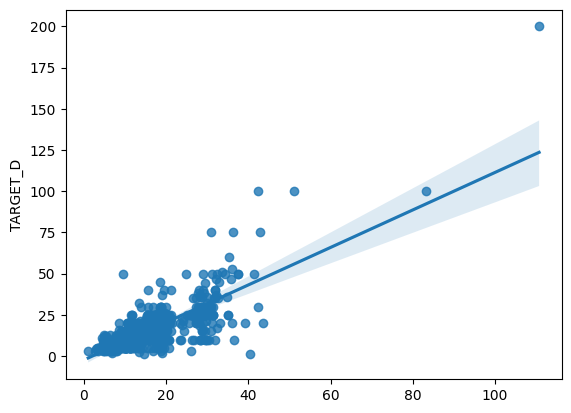

In [93]:
sns.regplot(x=predictions, y=y_test)

**Conclusions:**
* As "promised", removing the columns didn't change the metrics too much;
* From the techniques used, choosing according to the Feature Importance worked better;
* When possible, use Feature Importance to remove less important features.

For now, let's pretend we are satisfied with the results for the regression part of the problem.

### Classification Model

Considering that for the business case, we only need to know if the donor will donate or not, let's make it a binary classification problem:

In [94]:
data_cls = data_final.copy().set_index("CONTROLN")
# data_cls = pd.get_dummies(data).set_index("CONTROLN")
data_cls["TARGET_C"] = data_cls["TARGET_D"].apply(lambda x: 1 if x > 0 else 0)
data_cls = data_cls.drop("TARGET_D", axis=1)
data_cls["TARGET_C"].value_counts()

0    90569
1     4843
Name: TARGET_C, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler

X = data_cls.drop("TARGET_C", axis=1)
y = data_cls["TARGET_C"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train_res)

X_train_std = scaler.transform(X_train_res)
X_test_std = scaler.transform(X_test)

clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train_std, y_train_res)

predictions = [1 if prob1 > 0.4 else 0 for prob0, prob1 in clf.predict_proba(X_test_std)]

print(classification_report(y_test, predictions))

roc_auc_score(y_test, clf.predict_proba(X_test_std)[:, 1])

              precision    recall  f1-score   support

           0       0.97      0.24      0.38     18114
           1       0.06      0.86      0.11       969

    accuracy                           0.27     19083
   macro avg       0.51      0.55      0.24     19083
weighted avg       0.92      0.27      0.37     19083



0.6271084074454268

In [96]:
clf.coef_

array([[ 7.38468999e-02, -1.34188702e-01,  1.64292688e-01,
         4.25769363e-02, -7.35827121e-02, -8.47727419e-02,
         8.61860014e-03, -6.68754614e-03,  7.65694846e-02,
         3.88810515e-02,  1.00273369e-01,  7.05730697e-03,
        -8.75838536e-02,  1.71141416e-02,  2.55114484e-03,
        -1.26252095e-04, -1.67155254e-02,  9.84918951e-03,
        -2.41458019e-02,  2.35517041e-01,  1.34844095e-02,
         4.04696409e-02,  1.34329682e-01,  2.35069932e-02,
         1.03791812e-02, -7.06250841e-03,  2.46328159e-03,
         1.32398472e-02, -2.80546771e-02, -6.85057452e-03,
         5.44296867e-04, -1.93977338e-02,  3.56907017e-02,
        -1.72895986e-02,  6.11917111e-03,  2.09190562e-02,
        -1.67987223e-02,  6.78049578e-02,  2.47563020e-02,
        -2.70934251e-02,  3.07023391e-02,  2.67787549e-02,
         4.90203381e-03,  5.02197002e-02,  1.36331802e-02,
         1.02419823e-01,  7.02619817e-03,  2.28904922e-02,
        -8.04434484e-03,  2.80163454e-02, -1.94249687e-0

In [97]:
importances = pd.Series([abs(i) for i in clf.coef_[0]], index=X_test.columns).sort_values(ascending=False)
importances

RFA_2_1         0.235517
RFA_2_2_G       0.232811
RFA_2_2_F       0.181934
HV2             0.164293
STATE_CA        0.134330
HV1             0.134189
RECP3_X         0.102420
NUMPROM         0.100273
CARDPM12        0.087584
IC1             0.084773
RFA_2_2_E       0.084093
IC4             0.076569
INCOME          0.073847
HV4             0.073583
STATE_OR        0.067805
STATE_other     0.050220
DOMAIN_1_U      0.046093
HV3             0.042577
STATE_AZ        0.040470
IC5             0.038881
STATE_MI        0.035691
STATE_TX        0.030702
STATE_IN        0.028055
VETERANS_Y      0.028016
STATE_TN        0.027093
STATE_WA        0.026779
DOMAIN_1_R      0.026666
STATE_SC        0.024756
DOMAIN_2        0.024146
STATE_CO        0.023507
GENDER_O        0.022890
STATE_NC        0.020919
DOMAIN_1_C      0.019425
STATE_LA        0.019398
STATE_MN        0.017290
NUMPRM12        0.017114
STATE_OK        0.016799
LASTGIFT        0.016716
MDMAUD_other    0.013633
STATE_AR        0.013484


In [98]:
cols = importances[:25].index

X = data_cls[cols]
y = data_cls["TARGET_C"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_train_res)

X_train_std = scaler.transform(X_train_res)
X_test_std = scaler.transform(X_test)

clf = LogisticRegression(class_weight={1:1.2}, max_iter=10000, random_state=42)
clf.fit(X_train_std, y_train_res)

predictions = [1 if prob1 > 0.4 else 0 for prob0, prob1 in clf.predict_proba(X_test_std)]

print(classification_report(y_test, predictions))

roc_auc_score(y_test, clf.predict_proba(X_test_std)[:, 1])

              precision    recall  f1-score   support

           0       0.97      0.09      0.16     18114
           1       0.05      0.95      0.10       969

    accuracy                           0.13     19083
   macro avg       0.51      0.52      0.13     19083
weighted avg       0.93      0.13      0.16     19083



0.6263324481015944

In [99]:
clf.predict_proba(X_test_std)

array([[0.29282344, 0.70717656],
       [0.45330917, 0.54669083],
       [0.26987107, 0.73012893],
       ...,
       [0.35915726, 0.64084274],
       [0.24934189, 0.75065811],
       [0.28936117, 0.71063883]])

Trying out KNN model:

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train_res)

predictions_knn = clf.predict(X_test_std)

print(classification_report(y_test, predictions_knn))
roc_auc_score(y_test, knn.predict_proba(X_test_std)[:, 1])

              precision    recall  f1-score   support

           0       0.97      0.46      0.63     18114
           1       0.07      0.71      0.12       969

    accuracy                           0.48     19083
   macro avg       0.52      0.59      0.37     19083
weighted avg       0.92      0.48      0.60     19083



0.505528824268909

### Analyzing the results

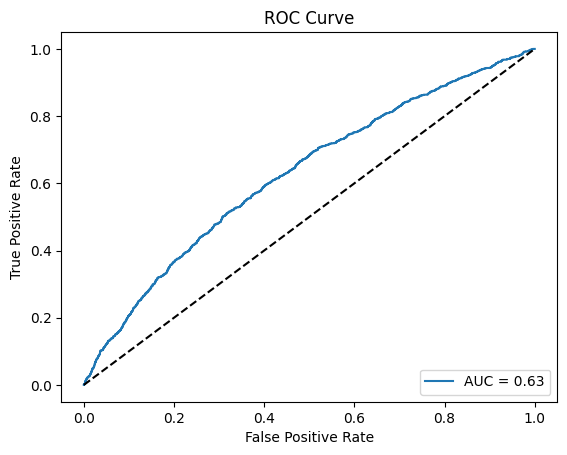

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_std)[:, 1])
auc = roc_auc_score(y_test, clf.predict_proba(X_test_std)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Bias-Variance Trade-Off

ERROR = Bias + Variance + irreducible_error

* **Bias** is how wrong your predictions are (Mean Absolute Error in regression models, Accuracy in classification models). High Bias suggests higher simplification, which means, more assumptions and generalization, which will result in more errors on our predictions.
* **Variance** is related to how similar the "spread" of the predictions is to the "spread" of the actual values. High Variance suggests a 'sensitive' model, which might give certain results if trained/tested in some rows of the dataset and considerably different results if trained/tested in other rows of the same dataset.

![](https://expoundai.files.wordpress.com/2019/05/bvcomplexitycurve-1.png?w=589)

Where:
* Total Error = sum of the residuals;
* Model complexity = the amount of features used.

Read more about it [here](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/).

#### Checking for Over/Under-fitting

* **Overfitting** is when you have a high variance but low bias. A quick way to check is to see if your train score is higher than your test score. To avoid it try having more data (rows) or removing irrelevant features.
<br><br>
* **Underfitting** is when you have a high bias but low variance. A quick way to check is to see if your test score is low. To avoid it, you will need to find out more relevant features you can add to your data.
<br><br>
![](https://miro.medium.com/max/700/1*UCd6KrmBxpzUpWt3bnoKEA.png)

Thy good ol' [article](https://towardsdatascience.com/underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6fe4a8a49dbf).

### Report
Now let's check we could if we can save $ from this model:

In [102]:
X_test["pred"] = predictions
X_test["TARGET_D"] = list(data_final[data_final["CONTROLN"].isin(X_test.index)]["TARGET_D"])
X_test

,RFA_2_1,RFA_2_2_G,RFA_2_2_F,HV2,STATE_CA,HV1,RECP3_X,NUMPROM,CARDPM12,IC1,RFA_2_2_E,IC4,INCOME,HV4,STATE_OR,STATE_other,DOMAIN_1_U,HV3,STATE_AZ,IC5,STATE_MI,STATE_TX,STATE_IN,VETERANS_Y,STATE_TN,pred,TARGET_D
CONTROLN,,,,,,,,,,,,,,,,,,,,,,,,,,,
124049,3,0,0,527,0,443,0,65,4,255,0,321,5.0,2,0,0,0,3,0,10258,0,1,0,0,0,1,0.0
57282,3,0,0,854,0,834,0,35,6,381,1,482,0.0,4,0,0,0,4,0,16287,0,0,0,0,0,1,0.0
160662,4,0,0,1034,1,939,0,59,6,191,0,299,0.0,3,0,0,0,3,0,11059,0,0,0,0,0,1,0.0
19050,4,0,0,848,0,779,0,77,6,355,1,447,2.0,3,0,0,0,3,0,15452,0,0,0,0,0,1,0.0
31313,3,0,1,596,0,580,0,23,6,309,0,348,2.0,2,0,0,0,3,0,10447,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94801,2,0,1,3100,0,3167,0,18,5,340,0,467,2.0,6,0,0,1,5,0,24152,0,0,0,0,0,1,0.0
85292,2,1,0,867,0,797,0,64,6,415,0,481,5.0,2,0,0,0,2,0,12421,0,0,0,0,0,1,0.0
8113,3,0,1,466,0,368,0,129,6,260,0,320,3.0,1,0,0,0,2,0,10480,0,0,0,0,0,1,0.0


In [103]:
# Report:

total_donations = X_test["TARGET_D"].sum().round()
print("Test Set:", len(X_test))
print("Mails Sent:", len(X_test[X_test["pred"] == 1]))
print("Total Donations: $", total_donations)

donations_missed = len(X_test[(X_test["TARGET_D"] > 0) & (X_test["pred"] == 0)])
amount_missed = round(sum(X_test[(X_test["TARGET_D"] > 0) & (X_test["pred"] == 0)]["TARGET_D"]), 2)
print(f"Donations Missed: {donations_missed} of {len(X_test[X_test['TARGET_D'] > 0])} - {round(donations_missed/len(X_test[X_test['TARGET_D'] > 0])*100, 2)}%")
print(f"Money Missed: {amount_missed} - {round(amount_missed/total_donations*100, 2)}%")

amount_spent = round(len(X_test[X_test["pred"] == 1]) * .68, 2)
print(f"Amount Spent on Mail: ${amount_spent}")

total_profit = sum(X_test[(X_test["TARGET_D"] > 0) & (X_test["pred"] == 1)]["TARGET_D"]) - amount_spent
print("Total Profit: $", round(total_profit, 2))

print("Profit If Sent Mail to All: $", round(sum(X_test["TARGET_D"]) - (len(X_test) * .68), 2))

Test Set: 19083
Mails Sent: 17414
Total Donations: $ 14639.0
Donations Missed: 78 of 969 - 8.05%
Money Missed: 1040.0 - 7.1%
Amount Spent on Mail: $11841.52
Total Profit: $ 1757.85
Profit If Sent Mail to All: $ 1662.93


**Conclusion:**
The model can still be optimized, it is still sending too many mails. We need more features to improve results and a better understanding of the relationship between the features and the amount donated.

***TO BE CONTINUED...***